In [2]:
import sys
import seaborn as sns
import os
import glob
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
import plot as pltfn
import admin_functions as adfn
from scipy import stats 
import IS as isfn
import pandas as pd

sns.reset_orig()
#plt.style.use('dark_background')

%load_ext autoreload
%autoreload
     
# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'

In [3]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 
os.chdir(Fdrop + 'Project/' + experiment)
d_powlist = sorted(glob.glob('*BLN*power*dur*.npy*')) 
d_loglist = sorted(glob.glob('*BLN*logn*dur*'))
d_powlist, d_loglist

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_param_marglik_power_dur.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_param_marglik_logn_dur.npy',
  'PTZ-WILDTYPE-03_2photon_s

In [ ]:
shape = 320
avlist = list(range(shape))
nums = adfn.name(F10t, experiment, 2, 12)
for t in nums:
    itav = sorted(glob.glob('*E-' + str(t) + '*nnbav.npy*')) 
    for i in range(len(itav)): 
        avlist[i] = powerfit(Fdrop, experiment, np.load(itav[i])[0])
    np.save(Fdrop + 'Project/' + experiment + os.sep + itav[i][:itav[i].find('run')+6] + 'sizeparamsweepp_log', avlist)
    print('Done fish num ' + str(f))     

In [ ]:
for i in num1:
    avlist =  sorted(glob.glob('*-' + i + '*BLN*nnbav.npy'))[:180]
    powerlist = list(range(200))
    lognlist = list(range(200))
    for e in range(len(avlist)):
        data = np.load(avlist[e])
        sizes=data[0,:]
        M=len(sizes)
        a=min(sizes) #define xmin
        b=max(sizes) #define xmax
        npart = 2000 #number of particles - number of draws from prior distribution
        ln=IS_LN(npart)
        po=IS(npart)
        powerlist[e] = po
        lognlist[e] = ln
        print('Done param ' + str(e) + 'for fish ' + adfn.name_template([avlist[e]], 'short'))
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[e]], 'short') + '_marglik_power.npy', powerlist)
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[e]], 'short') + '_marglik_logn.npy', lognlist)
    print('Done fish ' + adfn.name_template([avlist[e]], 'short'))

In [ ]:
num1 = ['02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
for i in num1:
    avlist =  sorted(glob.glob('*-' + i + '*BLN*nnbav.npy'))[:180]
    powerlist = list(range(200))
    lognlist = list(range(200))
    for e in range(len(avlist)):
        data = np.load(avlist[e])
        sizes=data[1,:]
        a=2 #define xmin
        b=max(sizes) #define xmax
        M=len(sizes[np.where(sizes>a-1)])
        npart = 2000 #number of particles - number of draws from prior distribution
        ln=isfn.IS_LN(npart, sizes, M, a, b)
        po=isfn.IS(npart, sizes, M, a, b)
        powerlist[e] = po
        lognlist[e] = ln
        print('Done param ' + str(e) + 'for fish ' + adfn.name_template([avlist[e]], 'short'))
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[e]], 'short') + '_marglik_power_dur.npy', powerlist)
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[e]], 'short') + '_marglik_logn_dur.npy', lognlist)
    print('Done fish ' + adfn.name_template([avlist[e]], 'short'))

# Baseline - parameter sweep

### Exponent
* exponent is parameter dependent
* variance decreases as the exponent approaches theoretical values ~ 2.0
* Higher P(Ca2+ event) values over-estimate firing frequency - we chose those that best capture firing events in data

In [3]:
shape = (180)
count=0
expsum = np.zeros((shape))
varvec = np.zeros((shape))
for i in range(shape):
    evec = []
    for t in range(len(s_powlist)):
        if type(np.load(s_powlist[t], allow_pickle=True)[i]) is not int:
            evec = np.append(evec, np.load(s_powlist[t], allow_pickle = True)[i][0])
        varvec[i] = np.var(evec)
        expsum[i] = np.sum(evec)/len(evec) 

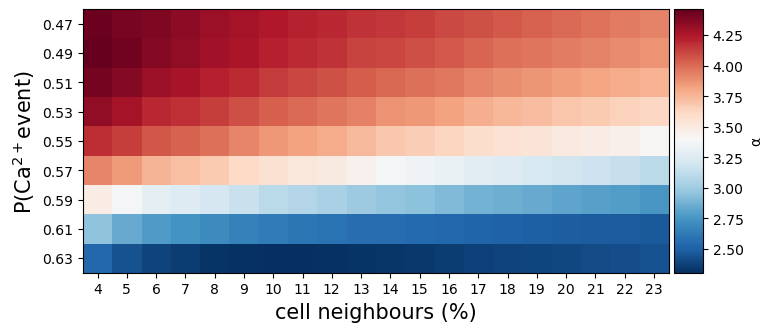

In [4]:
#SIZE - EXPONENT
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
xlist = list(range(21))
for i in range(len(xlist)):
    xlist[i] = str(np.int(np.linspace(3,23, 21)[i]))

divnorm = colors.DivergingNorm(vmin=np.min(expsum), vcenter=3.4, vmax=np.max(expsum))
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(expsum.shape[0]/nnbs)
expav = expsum.reshape((bcls,nnbs))    
plot1 = ax.imshow(expav, cmap = 'RdBu_r', norm = divnorm)
ax.set_xlabel('cell neighbours (%)', size = '15')
ax.set_ylabel('P(Ca$^{2+}$event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 10)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'α')
plt.savefig(Ffig + 'par_exp_size.svg', transparent = True)
plt.show()

In [68]:
shape = (180)
count=0
expsum = np.zeros((shape))
varvec = np.zeros((shape))
for i in range(shape):
    evec = []
    for t in range(len(d_powlist)):
        if type(np.load(d_powlist[t], allow_pickle=True)[i]) is not int:
            evec = np.append(evec, np.load(d_powlist[t], allow_pickle = True)[i][0])
        varvec[i] = np.var(evec)
        expsum[i] = np.sum(evec)/len(evec) 

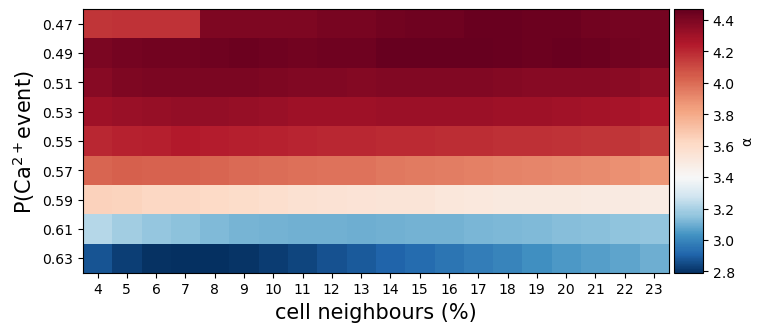

In [69]:
#SIZE - EXPONENT
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
xlist = list(range(21))
for i in range(len(xlist)):
    xlist[i] = str(np.int(np.linspace(3,23, 21)[i]))

divnorm = colors.DivergingNorm(vmin=np.min(expsum), vcenter=3.4, vmax=np.max(expsum))
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(expsum.shape[0]/nnbs)
expav = expsum.reshape((bcls,nnbs))    
plot1 = ax.imshow(expav, cmap = 'RdBu_r', norm = divnorm)
ax.set_xlabel('cell neighbours (%)', size = '15')
ax.set_ylabel('P(Ca$^{2+}$event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 10)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'α')
plt.savefig(Ffig + 'par_exp_dur.svg', transparent = True)
plt.show()

#### Marginal likelihood map
* power law is invariant to parameters

* {calculate individual marginal likelihood values for each fish}
* {loglik ratio - sum marglikelihoods for each fish for power law and lognormal - overall ratio}

In [81]:
shape = (180)
mratio = np.zeros((shape))
for i in range(shape):
    powvec, logvec = 0,0
    for t in range(len(s_powlist)):
        if type(np.load(s_powlist[t], allow_pickle=True)[i]) is not int:
            powvec = powvec + np.load(s_powlist[t], allow_pickle = True)[i][1]
            logvec = logvec +  np.load(s_loglist[t], allow_pickle = True)[i][2]
    mratio[i] = powvec - logvec

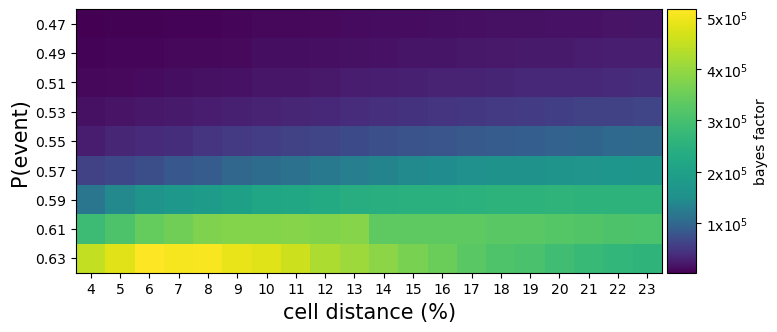

In [82]:
#MARGINAL LIKELIHOOD
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
xlist = list(range(21))
for i in range(len(xlist)):
    xlist[i] = str(np.int(np.linspace(3,23, 21)[i]))

divnorm = colors.DivergingNorm(vmin=np.min(mratio), vcenter=150000, vmax=np.max(mratio))
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(mratio.shape[0]/nnbs)
margav = mratio.reshape((bcls,nnbs))    
plot1 = ax.imshow(margav, cmap = 'viridis', norm=divnorm)
ax.set_xlabel('cell distance (%)', size = '15')
ax.set_ylabel('P(event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 10)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'bayes factor')
cbar0.ax.set_yticklabels(['1x10$^{5}$', '2x10$^{5}$', '3x10$^{5}$', '4x10$^{5}$', '5x10$^{5}$', '6x10$^{5}$'])  # vertically oriented colorbar
plt.savefig(Ffig + 'par_LLR_size.svg', transparent = True)
plt.show()

In [75]:
shape = (180)
mratio = np.zeros((shape))
for i in range(shape):
    powvec, logvec = 0,0
    for t in range(len(d_powlist)):
        if type(np.load(d_powlist[t], allow_pickle=True)[i]) is not int:
            powvec = powvec + np.load(d_powlist[t], allow_pickle = True)[i][1]
            logvec = logvec +  np.load(d_loglist[t], allow_pickle = True)[i][2]
    mratio[i] = powvec - logvec

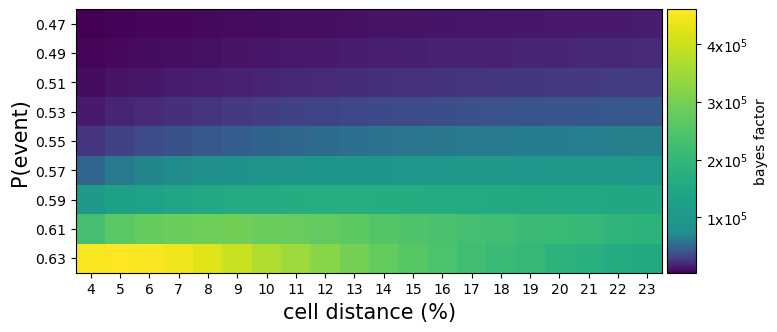

In [76]:
#MARGINAL LIKELIHOOD
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
xlist = list(range(21))
for i in range(len(xlist)):
    xlist[i] = str(np.int(np.linspace(3,23, 21)[i]))

divnorm = colors.DivergingNorm(vmin=np.min(mratio), vcenter=150000, vmax=np.max(mratio))
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(mratio.shape[0]/nnbs)
margav = mratio.reshape((bcls,nnbs))    
plot1 = ax.imshow(margav, cmap = 'viridis', norm=divnorm)
ax.set_xlabel('cell distance (%)', size = '15')
ax.set_ylabel('P(event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 10)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'bayes factor')
cbar0.ax.set_yticklabels(['1x10$^{5}$', '2x10$^{5}$', '3x10$^{5}$', '4x10$^{5}$', '5x10$^{5}$', '6x10$^{5}$'])  # vertically oriented colorbar
plt.savefig(Ffig + 'par_LLR_dur.svg', transparent = True)
plt.show()

#### Branching ratio map
* branching ratio is close to critical value for all parameter values

In [5]:
# PLOT - average whole brain fluorescence
#----------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(F10t + 'Project/' + experiment)
branchlist =  sorted(glob.glob('*-08*BLN*_branch.npy'))

In [7]:
num = adfn.name_zero('front', 2, 12,1)
shape = (200)
b_sum = np.zeros((11, shape))
count=0
for e in num:
    branchlist =  sorted(glob.glob('*E-*' + e + '*BLN*_branch.npy'))
    for i in range(len(branchlist)):
        b_sum[count,i] = np.load(branchlist[i])
    count+=1

b_mean = np.zeros(200)

for i in range(b_sum.shape[1]):
    b_mean[i] = np.sum(b_sum[:,i])/ np.where(b_sum[:,i] >0)[0].shape[0]

In [11]:
b_mean.shape

(200,)

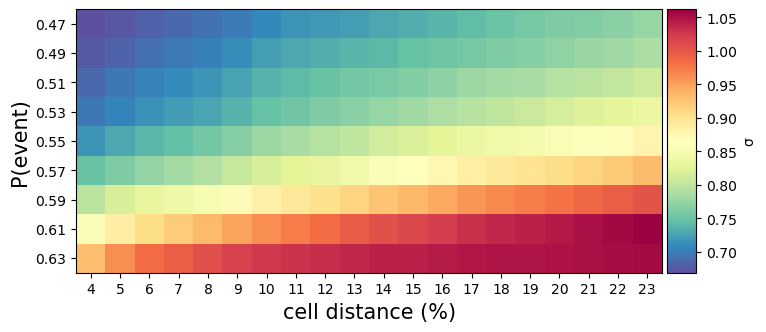

In [13]:
#BRANCHING RATIO
xlist = list(range(21))
for i in range(len(xlist)):
    xlist[i] = str(np.int(np.linspace(3,23, 21)[i]))
from mpl_toolkits.axes_grid1 import make_axes_locatable
#divnorm = colors.DivergingNorm(vmin=np.min(mratio), vcenter=150000, vmax=np.max(mratio))
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = 9 #np.int(b_mean.shape[0]/nnbs)
bmean_mat = b_mean[:180].reshape((bcls,nnbs))    
plot1 = ax.imshow(bmean_mat, cmap = 'Spectral_r')
ax.set_xlabel('cell distance (%)', size = '15')
ax.set_ylabel('P(event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 10)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'σ')
plt.savefig(Ffig + 'par_BR.svg', transparent = True)
plt.show()

In [3]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 
os.chdir(Fdrop + 'Project/' + experiment)
dcc_list = sorted(glob.glob('*DCC*sweep*'))
dcc_list

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01-DCC-sweep.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01-DCC-sweep.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01-DCC-sweep.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01-DCC-sweep.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01-DCC-sweep.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01-DCC-sweep.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01-DCC-sweep.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01-DCC-sweep.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01-DCC-sweep.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09-DCC-sweep.npy']

In [ ]:
# PLOT - average whole brain fluorescence
#----------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(F10t + 'Project/' + experiment)
av_list =  sorted(glob.glob('*av*'))

In [ ]:
num = adfn.name_zero('front', 4, 12, 1)
for i in num:
    av_list = sorted(glob.glob('*-' + i + '*BLN*av*'))[:180]
    nnb = np.arange(4, 24)
    bcl = np.arange(0.47, 0.63, 0.02)
    curr_fish = np.zeros((nnb.shape[0], bcl.shape[0])).T

    count=0
    for e in range(curr_fish.shape[0]):
        for x in range(curr_fish.shape[1]):
            curr_av = np.load(av_list[count])
            curr_fish[e][x] = crfn.DCC(curr_av)
            count+=1
    name = adfn.name_template([av_list][0], 'short') 
    np.save(savepath + name + '-DCC-sweep.npy', curr_fish)
    print('DOne ' + str(i))

In [19]:
shape = (180)
dcc_sum = np.zeros((10, shape))
count=0
for e in range(len(dcc_list)):
    curr = np.load(dcc_list[e])
    flat = np.ravel(curr)
    for x in range(len(flat)):
        dcc_sum[e, x] = flat[x]

dcc_mean = np.zeros(180)
for i in range(dcc_sum.shape[1]):
    dcc_mean[i] = np.sum(dcc_sum[:,i])/ np.where(dcc_sum[:,i] >0)[0].shape[0]

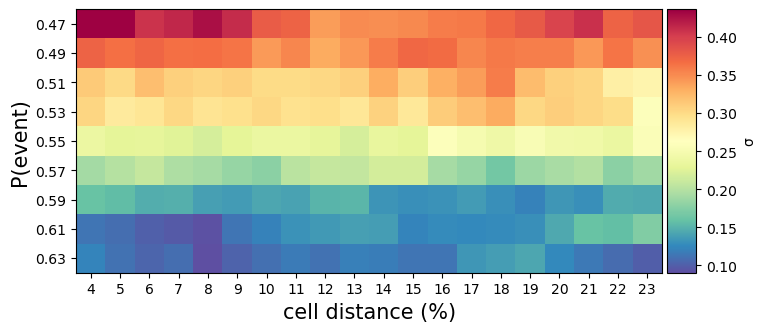

In [32]:
#DCC
xlist = list(range(21))
for i in range(len(xlist)):
    xlist[i] = str(np.int(np.linspace(3,23, 21)[i]))
from mpl_toolkits.axes_grid1 import make_axes_locatable
#divnorm = colors.DivergingNorm(vmin=np.min(mratio), vcenter=150000, vmax=np.max(mratio))
f, ax = plt.subplots(figsize = (8,5))

nnbs = 20
bcls = 9 #np.int(b_mean.shape[0]/nnbs)
mean_mat = dcc_mean[:180].reshape((bcls,nnbs))    
plot1 = ax.imshow(mean_mat, cmap = 'Spectral_r')
ax.set_xlabel('cell distance (%)', size = '15')
ax.set_ylabel('P(event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 10)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'σ')
#plt.savefig(Ffig + 'par_BR.svg', transparent = True)
plt.show()

# Seizure - parameter sweep

#### KS distance map 
* deviation from baseline distribution is consistent across parameters

In [63]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
kslist = sorted(glob.glob('*param_ks*'))
kslist

['_param_ks.npy']

In [64]:
shape = (200)
count=0
ks_sum = np.zeros((shape))
for i in range(shape):
    ks_vec = []
    for t in range(len(np.load(kslist[0]))):
        ks_vec = np.append(ks_vec, np.load(kslist[0])[t][i][0])
        ks_sum[i] = np.sum(ks_vec)/len(ks_vec) 

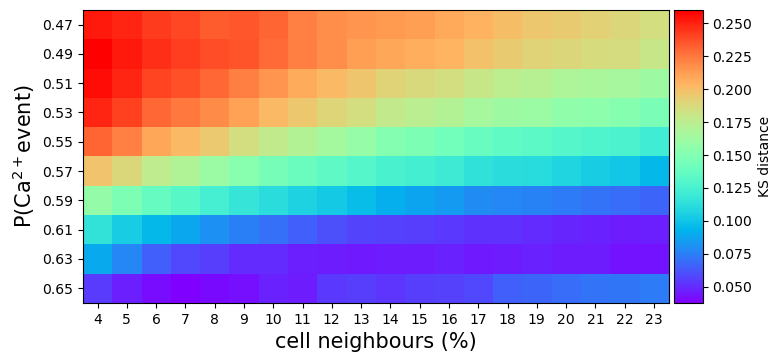

In [65]:
#KS distance
from mpl_toolkits.axes_grid1 import make_axes_locatable
#divnorm = colors.DivergingNorm(vmin=np.min(expsum), vcenter=3.4, vmax=np.max(expsum))
xlist = list(range(21))
for i in range(len(xlist)):
    xlist[i] = str(np.int(np.linspace(3,23, 21)[i]))
    
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(ks_sum.shape[0]/nnbs)
ks_av = ks_sum.reshape((bcls,nnbs))    
plot1 = ax.imshow(ks_av, cmap = 'rainbow')#, norm = divnorm)
ax.set_xlabel('cell neighbours (%)', size = '15')
ax.set_ylabel('P(Ca$^{2+}$event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 10)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'KS distance')
plt.show()

In [29]:
shape = (200)
count=0
p_sum = np.zeros((shape))
for i in range(shape):
    p_vec = []
    for t in range(len(np.load(kslist[0]))):
        p_vec = np.append(p_vec, np.load(kslist[0])[t][i][1])
        p_sum[i] = np.sum(p_vec < 0.05)/len(p_vec) 

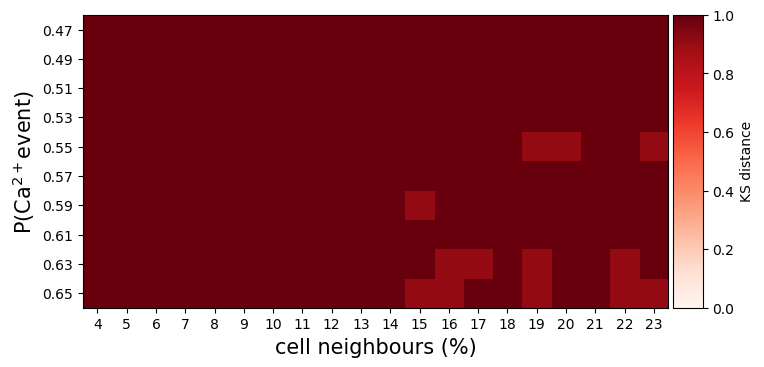

In [30]:
#p value
from mpl_toolkits.axes_grid1 import make_axes_locatable
#divnorm = colors.DivergingNorm(vmin=np.min(expsum), vcenter=3.4, vmax=np.max(expsum))
xlist = list(range(21))
for i in range(len(xlist)):
    xlist[i] = str(np.int(np.linspace(3,23, 21)[i]))
    
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(p_sum.shape[0]/nnbs)
p_av = p_sum.reshape((bcls,nnbs))    
plot1 = ax.imshow(p_av, cmap = 'Reds', vmin = 0, vmax = 1)
ax.set_xlabel('cell neighbours (%)', size = '15')
ax.set_ylabel('P(Ca$^{2+}$event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 10)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'KS distance')
plt.show()

#### Branching ratio change map

In [31]:
num = adfn.name_zero('front', 2, 12,1)
shape = (200)
b_sum = np.zeros((11, shape))
count=0
for e in num:
    b_branchlist =  sorted(glob.glob('*E-*' + e + '*BLN*_branch.npy'))
    p_branchlist =  sorted(glob.glob('*E-*' + e + '*PTZ20*_branch.npy'))
    for i in range(len(b_branchlist)):
        b_sum[count,i] = np.load(p_branchlist[i]) - np.load(b_branchlist[i])
    count+=1

b_mean = np.zeros(200)

for i in range(b_sum.shape[1]):
    b_mean[i] = np.sum(b_sum[:,i])/ np.where(b_sum[:,i] >0)[0].shape[0]

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


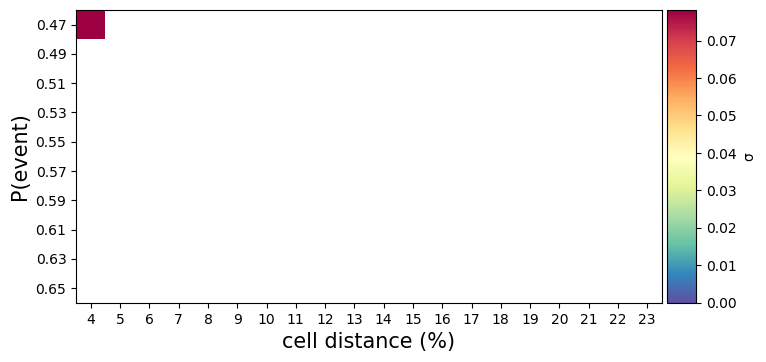

In [32]:
#BRANCHING RATIO CHANGE
xlist = list(range(21))
for i in range(len(xlist)):
    xlist[i] = str(np.int(np.linspace(3,23, 21)[i]))
from mpl_toolkits.axes_grid1 import make_axes_locatable
#divnorm = colors.DivergingNorm(vmin=np.min(mratio), vcenter=150000, vmax=np.max(mratio))
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(b_mean.shape[0]/nnbs)
bmean_mat = b_mean.reshape((bcls,nnbs))    
plot1 = ax.imshow(bmean_mat, cmap = 'Spectral_r', vmin = 0)
ax.set_xlabel('cell distance (%)', size = '15')
ax.set_ylabel('P(event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 10)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'σ')
plt.show()

# Deviation from baseline

### avalanches


In [208]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_av.npy*'))
p5list = sorted(glob.glob('*PTZ05*_av.npy*'))
p20list = sorted(glob.glob('*PTZ20*_av.npy*'))
blnlist, p5list, p20list

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_av.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
  'PTZ-WILDTYPE-07_2photon_se

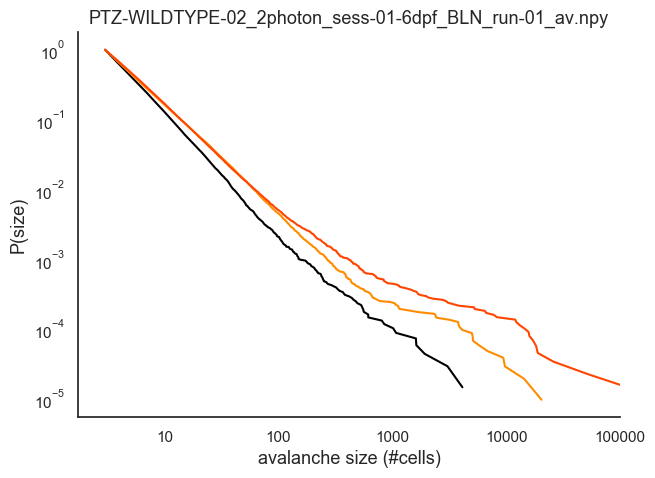

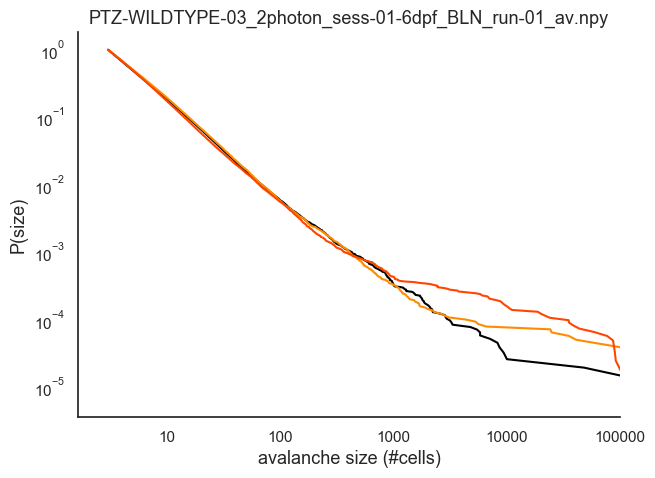

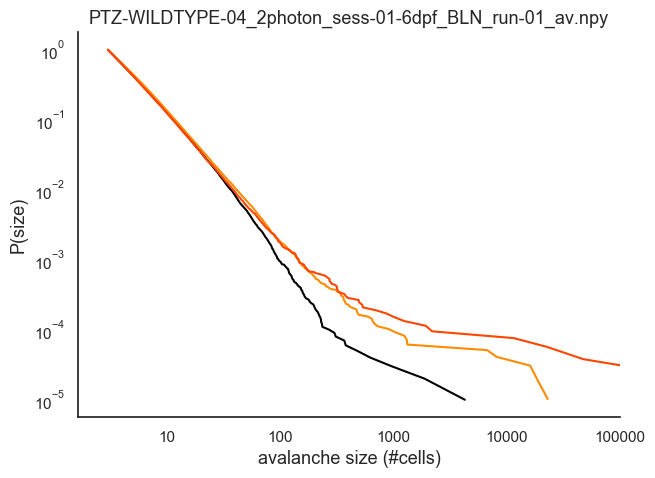

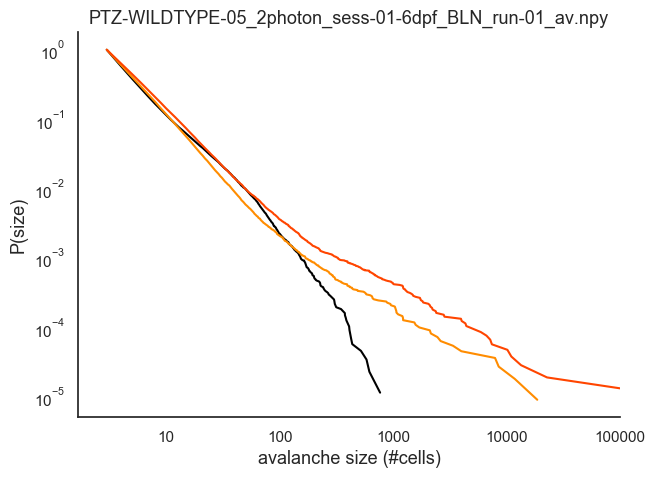

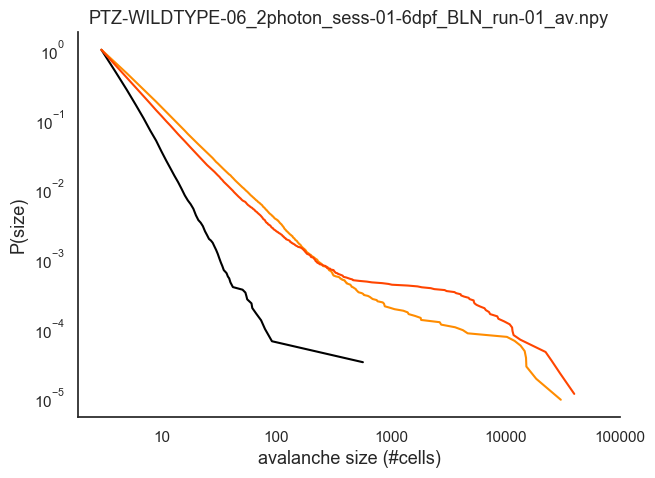

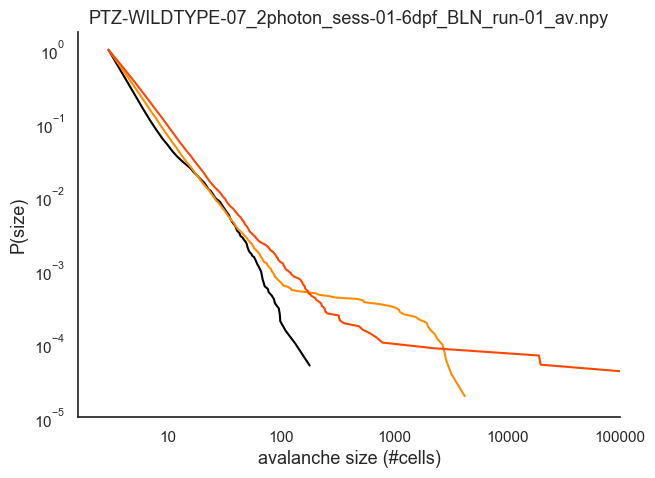

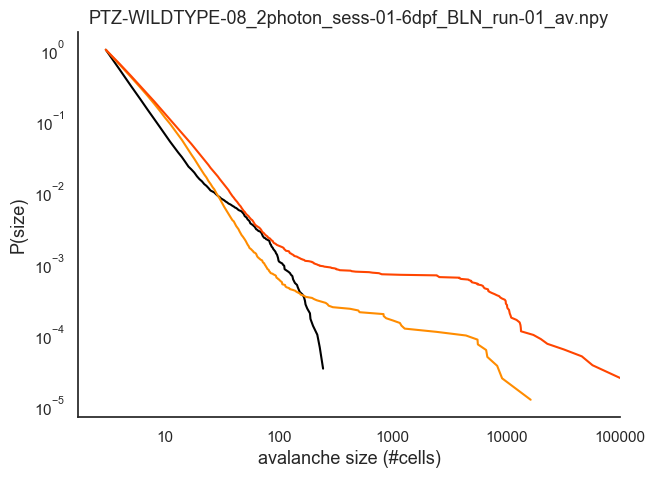

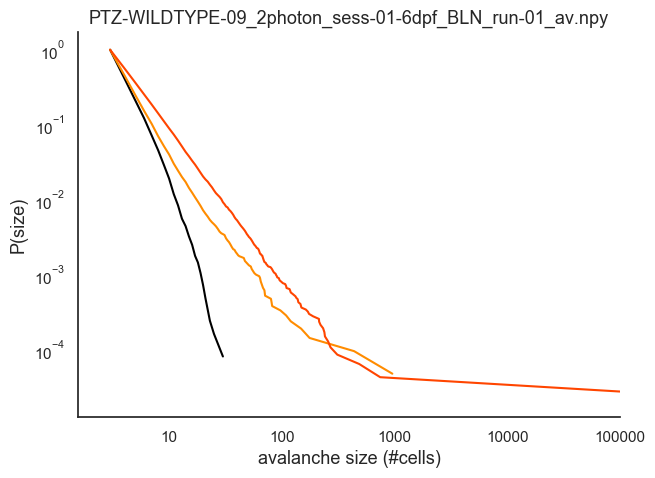

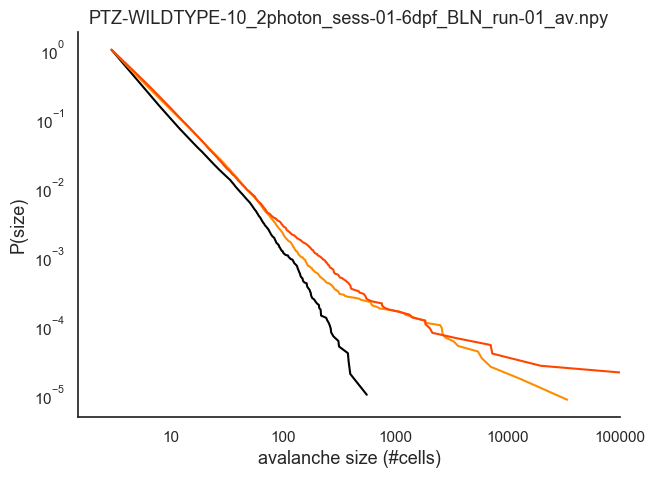

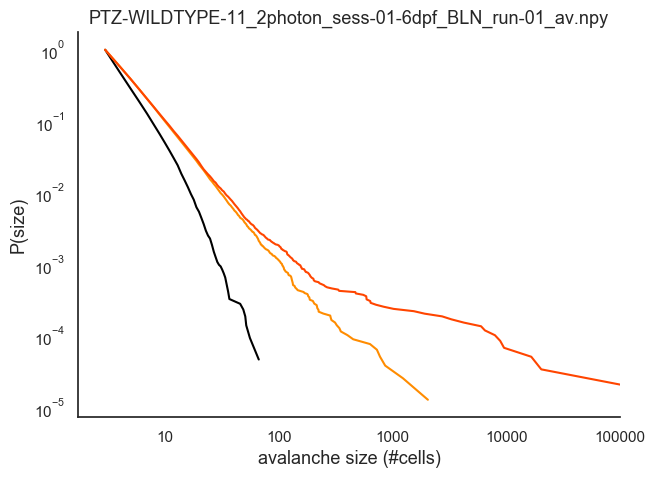

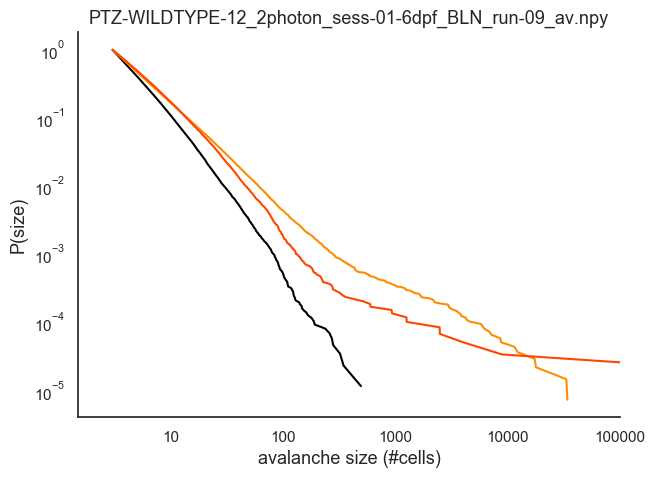

In [209]:
import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'darkorange','orangered']
lines = ['-', '-', '-']
choose=0
for i in num1:
    os.chdir(Fdrop + 'Project/' + experiment)
    blnlist = sorted(glob.glob('*E-' + i + '*BLN*_av.npy*'))
    p5list = sorted(glob.glob('*E-' + i + '*PTZ05*_av.npy*'))
    p20list = sorted(glob.glob('*E-' + i + '*PTZ20*_av.npy*'))
    plotlist = [blnlist,p5list,p20list]
    fig, axarr = plt.subplots(figsize = (7,5))
    for e in range(len(plotlist)):
        avdistcut = np.load(plotlist[e][0])[choose]
        powerlaw.plot_ccdf(avdistcut, linestyle = lines[e],linewidth =1.5 , markersize = 1, alpha = 1, c = colors[e])
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    plt.xlim(right = 100000)  
    #plt.ylim(bottom = 0.000005)  
    axarr.set_title(str(blnlist[0]), size = '13')
    axarr.set_ylabel('P(size)', size = '13')
    axarr.set_xlabel('avalanche size (#cells)', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()

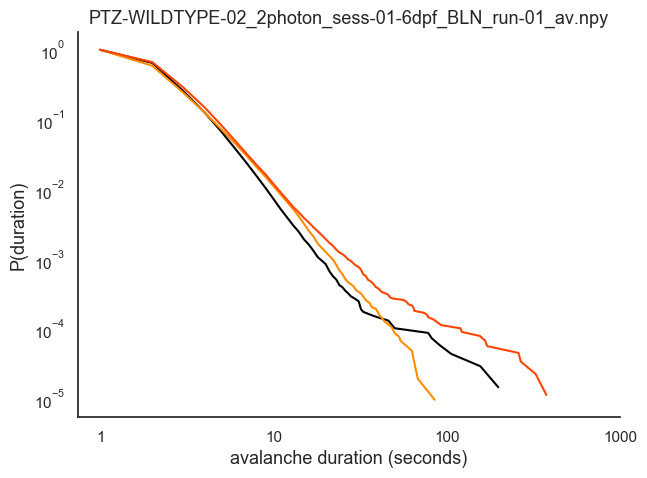

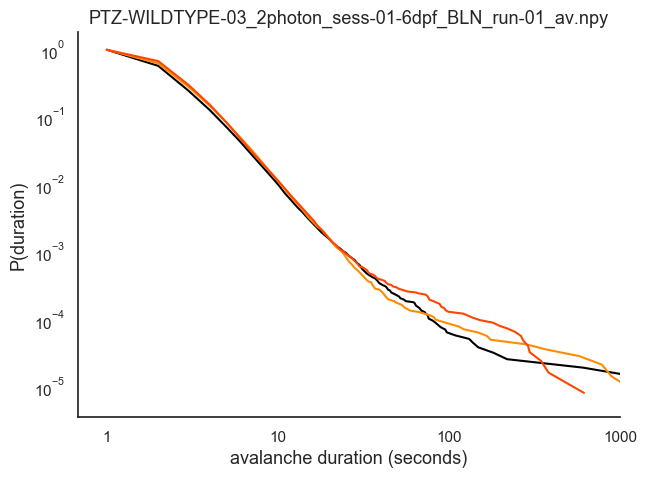

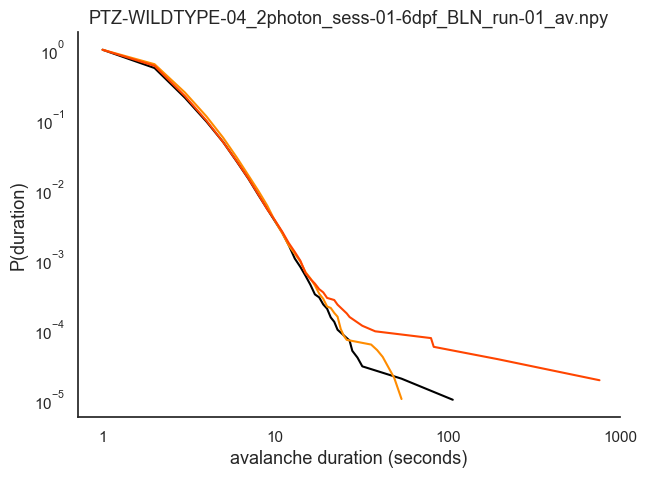

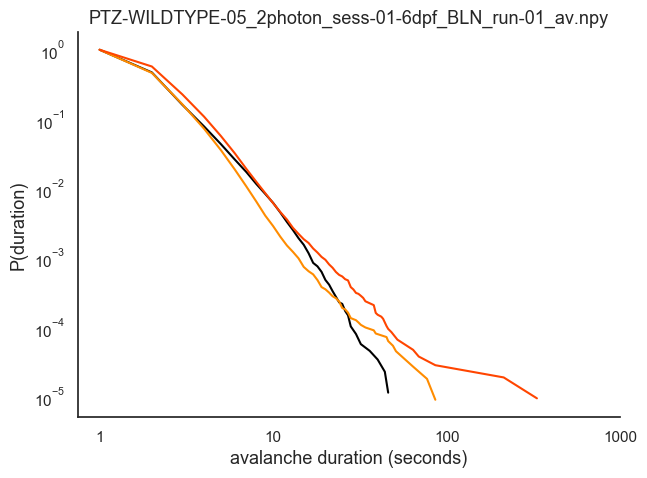

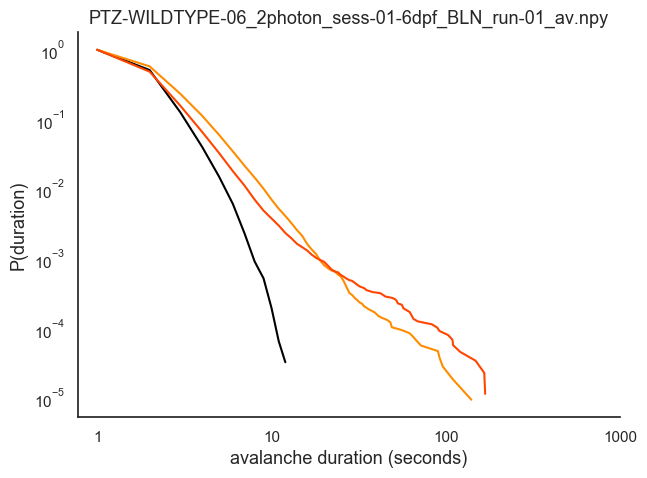

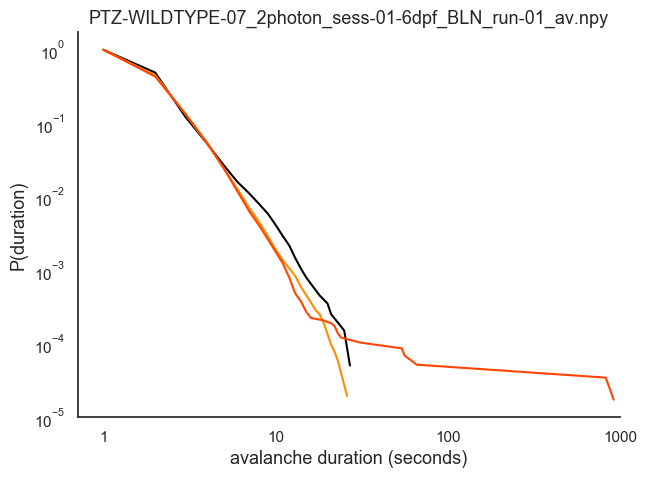

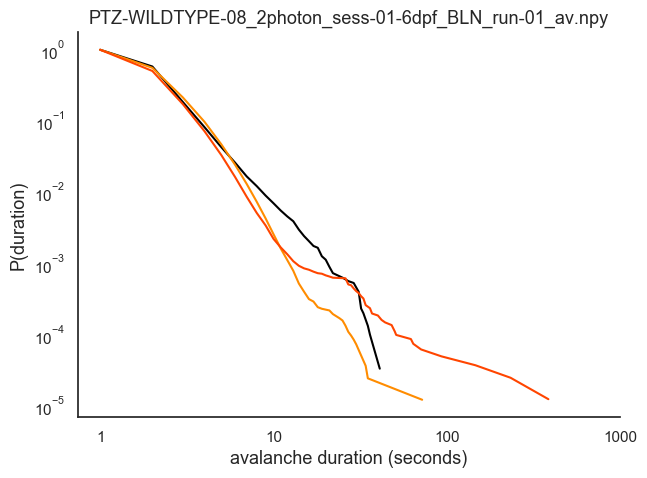

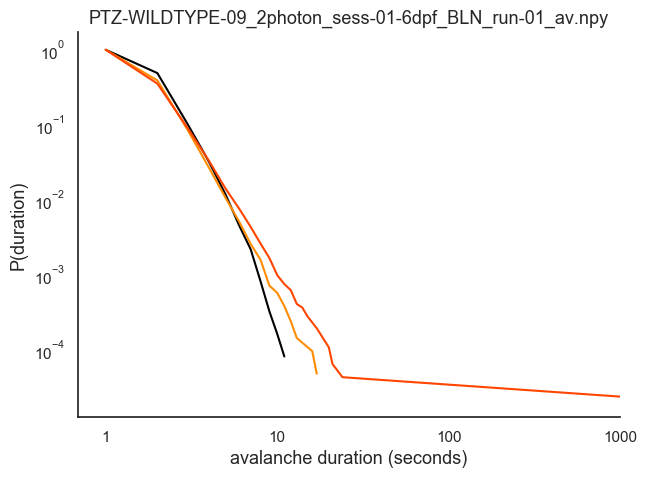

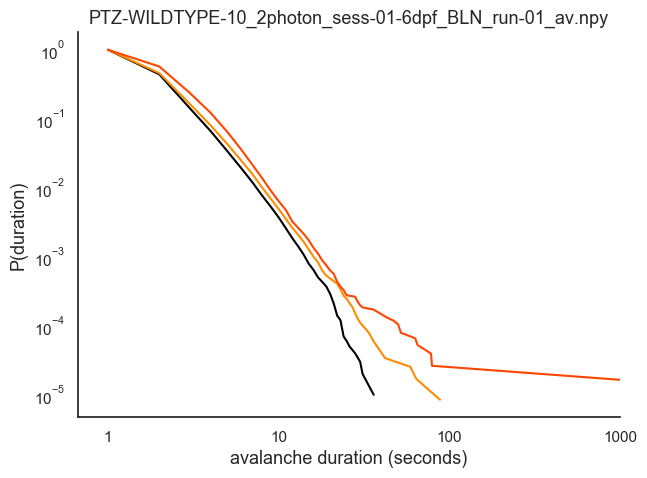

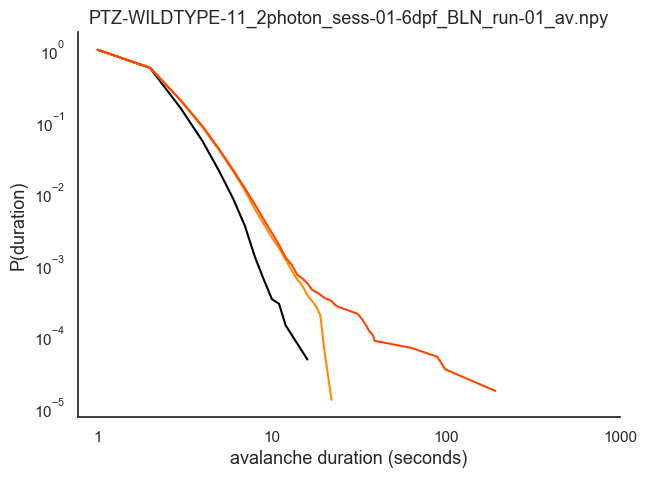

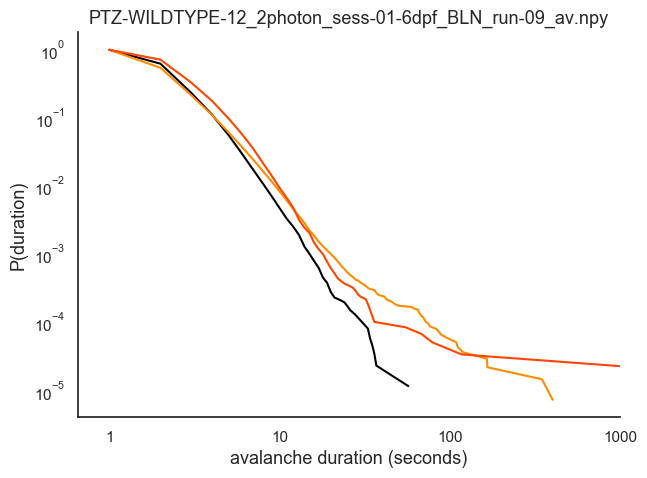

In [210]:
import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'darkorange','orangered']
lines = ['-', '-', '-']
choose=1
for i in num1:
    os.chdir(Fdrop + 'Project/' + experiment)
    blnlist = sorted(glob.glob('*E-' + i + '*BLN*_av.npy*'))
    p5list = sorted(glob.glob('*E-' + i + '*PTZ05*_av.npy*'))
    p20list = sorted(glob.glob('*E-' + i + '*PTZ20*_av.npy*'))
    plotlist = [blnlist,p5list,p20list]
    fig, axarr = plt.subplots(figsize = (7,5))
    for e in range(len(plotlist)):
        avdistcut = np.load(plotlist[e][0])[choose]
        powerlaw.plot_ccdf(avdistcut, linestyle = lines[e],linewidth =1.5 , markersize = 1, alpha = 1, c = colors[e])
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    plt.xlim(right = 1000)  
    #plt.ylim(bottom = 0.000005)  
    axarr.set_title(str(blnlist[0]), size = '13')
    axarr.set_ylabel('P(duration)', size = '13')
    axarr.set_xlabel('avalanche duration (seconds)', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()

### KS distance 
* deviation from baseline critical distribution across all datasets

In [33]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
sblnlist = sorted(glob.glob('*BLN*size*marglik_power.npy*'))
sp5list = sorted(glob.glob('*PTZ05*size*marglik_power.npy*'))
sp20list = sorted(glob.glob('*PTZ20*size*marglik_power.npy*'))
dblnlist = sorted(glob.glob('*BLN*dur*marglik_power.npy*'))
dp5list = sorted(glob.glob('*PTZ05*dur*marglik_power.npy*'))
dp20list = sorted(glob.glob('*PTZ20*dur*marglik_power.npy*'))
blnavlist = sorted(glob.glob('*BLN*_av.npy*'))
p5avlist = sorted(glob.glob('*PTZ05*_av.npy*'))
p20avlist = sorted(glob.glob('*PTZ20*_av.npy*'))
p5avlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ05_run-01_av.npy']

In [ ]:
#SIZE - PTZ20 MARGINAL LIKELIHOODS
""""count=0
choose = 0
prac_blnexp = np.zeros(11)
num1 = adfn.name_zero('front', 2, 12, 1)
for i in num1:
    avlist =  sorted(glob.glob('*E-' + str(i) + '*PTZ05*_av.npy'))
    data = np.load(avlist[0])
    sizes=data[choose]
    M=len(sizes)
    a=min(sizes) #define xmin
    b=max(sizes) #define xmax
    npart = 2000 #number of particles - number of draws from prior distribution
    ln=IS_LN(npart)
    po=IS(npart)
    prac_blnexp[count] = po[0]
    count+=1
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[0]], 'short') + '_size_marglik_power.npy', po)
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[0]], 'short')  + '_size_marglik_log.npy', ln)
    print('Done fish ' + adfn.name_template([avlist[0]], 'short')) """"

In [ ]:
#DUR - BASELINE MARGINAL LIKELIHOODS
""""count=0
choose = 1
prac_blnexp = np.zeros(11)
for i in num1:
    avlist =  sorted(glob.glob('*E-' + str(i) + '*PTZ05*_av.npy'))
    data = np.load(avlist[0])
    sizes=data[choose]
    a=2 #define xmin
    b=max(sizes) #define xmax
    M=len(sizes[np.where(sizes>a-1)])
    npart = 2000 #number of particles - number of draws from prior distribution
    ln=IS_LN(npart)
    po=IS(npart)
    prac_blnexp[count] = po[0]
    count+=1
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[0]], 'short') + '_dur_marglik_power.npy', po)
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[0]], 'short')  + '_dur_marglik_log.npy', ln)
    print('Done fish ' + adfn.name_template([avlist[0]], 'short'))

In [34]:
#SIZE - KS
ks = np.zeros((22, 2))
avlist = [p5avlist,p20avlist]
fli = list(range(11))
flist=[]
for i in range(11):
    fli[i] = 'F' + str(i+2)
for e in range(2):
    flist = np.append(flist, fli)

size_ptz_df = {}
count=0
choose = 0
for i in range(2):
    for y in range(11):
        ks[count] = stats.ks_2samp(np.load(blnavlist[y])[choose],np.load(avlist[i][y])[choose])
        count+=1
size_ptz_df = pd.DataFrame({"KS distance":ks[:,0] , "p":ks[:,1], "Labels":  np.append(adfn.repeat_list('PTZ 5mM',11),adfn.repeat_list('PTZ 20mM',11)), "Fish":flist})

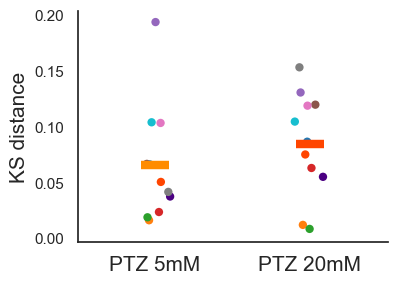

In [35]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['darkorange','orangered']
fig, ax = plt.subplots(figsize = (4,3))
ax = sns.pointplot(x="Labels", y="KS distance", data = size_ptz_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=3, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="Labels", y="KS distance", data=size_ptz_df, hue = 'Fish', palette = colors1, size = 6, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('KS distance', size = '15')
ax.set_xticklabels(['PTZ 5mM', 'PTZ 20mM'], size = 15)
ax.legend_.remove()
#plt.hlines(1, -0.05 ,2, linestyle = '--', color = 'grey')
#plt.ylim(0.5,1.3)
plt.show()

In [36]:
#DUR - KS
ks = np.zeros((22, 2))
avlist = [p5avlist,p20avlist]
fli = list(range(11))
flist=[]
for i in range(11):
    fli[i] = 'F' + str(i+2)
for e in range(2):
    flist = np.append(flist, fli)
    
dur_ptz_df = {}
count=0
choose = 1
for i in range(2):
    for y in range(11):
        ks[count] = stats.ks_2samp(np.load(blnavlist[y])[choose],np.load(avlist[i][y])[choose])
        count+=1
dur_ptz_df = pd.DataFrame({"KS distance":ks[:,0] , "p":ks[:,1], "Labels":  np.append(adfn.repeat_list('PTZ 5mM',11),adfn.repeat_list('PTZ 20mM',11)), "Fish":flist})

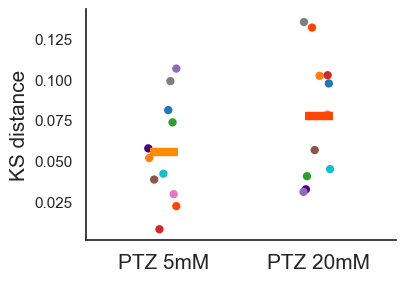

In [37]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['darkorange','orangered']
fig, ax = plt.subplots(figsize = (4,3))
ax = sns.pointplot(x="Labels", y="KS distance", data = dur_ptz_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=3, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="Labels", y="KS distance", data=dur_ptz_df, hue = 'Fish', palette = colors1, size = 6, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('KS distance', size = '15')
ax.set_xticklabels(['PTZ 5mM', 'PTZ 20mM'], size = 15)
ax.legend_.remove()
#plt.hlines(1, -0.05 ,2, linestyle = '--', color = 'grey')
#plt.ylim(0.5,1.3)
plt.show()

### Branching ratio
* Branching ratio increases during seizures beyond critical point

In [38]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnbranchlist = sorted(glob.glob('*BLN*_branch*'))
p5branchlist = sorted(glob.glob('*PTZ05*_branch*'))
p20branchlist = sorted(glob.glob('*PTZ20*_branch*'))
blnbranchlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09__branch.npy']

In [39]:
import pandas as pd
all_list = [blnbranchlist, p5branchlist, p20branchlist]
blist = adfn.list_of_list(3,0)
for t in range(len(blist)):
    for i in range(len(blnbranchlist)):
        blist[t] = np.append(blist[t], np.load(all_list[t][i]))


fli = list(range(11))
flist=[]
for i in range(11):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)
branchdic = {
  "branch ratio": np.append(np.append(blist[0], blist[1]),blist[2]), "condition": np.append(np.append(adfn.repeat_list('baseline',11),adfn.repeat_list('PTZ 5mM',11)),adfn.repeat_list('PTZ 20mM',11)), "Fish": flist}
branchdf = pd.DataFrame(branchdic)

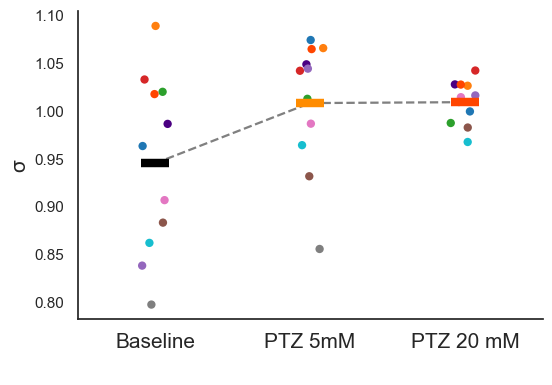

In [40]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['black','darkorange','orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="condition", y="branch ratio", data = branchdf, hue = 'condition', palette = colors2, join=True, ci=0, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.pointplot(x="condition", y="branch ratio", data=branchdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="condition", y="branch ratio", data=branchdf, hue = 'Fish', palette = colors1, size = 6, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('σ', size = '15')
ax.set_xticklabels(['Baseline', 'PTZ 5mM', 'PTZ 20 mM'], size = 15)
ax.legend_.remove()
#plt.hlines(1, -0.05 ,2, linestyle = '--', color = 'grey')
#plt.ylim(0.5,1.3)
plt.show()

In [41]:
adfn.ttest(branchdf, 'condition', 'branch ratio', ['baseline', 'PTZ 5mM', 'PTZ 20mM'], mode='single')

[[-3.2933855920860537,
  0.008103536648894847,
  0.025,
  'Significant',
  'baseline - PTZ 5mM'],
 [-2.4970279803941384,
  0.03160737240859102,
  0.025,
  'Not significant',
  'baseline - PTZ 20mM']]

### Connectivity-distance
* compare change in slope in seizure vs baseline

In [42]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
tracelist = sorted(glob.glob('*_PTZ*cut*realtrace*')) 
distlist = sorted(glob.glob('*_PTZ*dist.npy*')) 
binlist = sorted(glob.glob('*_corrdist*'))
coordlist = sorted(glob.glob('*_PTZ*realcoord*'))
distlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_dist.npy',
 'PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_dist.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ05_run-01_dist.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_dist.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01_dist.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_dist.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ05_run-01_dist.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_dist.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01_dist.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01_dist.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01_dist.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_dist.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ05_run-01_dist.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_dist.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ05_run-01_dist.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01_dis

In [ ]:
#Calculate euclidean distance
#for e in range(len(coordlist)):
#    euc_mat = crfn.euclidean_mat(np.load(coordlist[e]), [.5, .5, 15])
#    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.save_name(e, coordlist) + '_' + 'dist.npy', mat)
#    print('Done fish #' + str(e))

In [ ]:
#Calculate corr-dist binning
#for e in range(len(distlist)):
#    corr = np.corrcoef(np.load(tracelist[e]))
#    np.save(savepath + adfn.save_name(e,tracelist) + '_' + 'corr.npy', corr)
#    corrdistbin = crfn.corrdis_bin(corr, np.load(distlist[e]), distlist[e], 200)
#    np.save(savepath + adfn.save_name(e,distlist) + '_' + 'corrdist_bins.npy', corrdistbin)

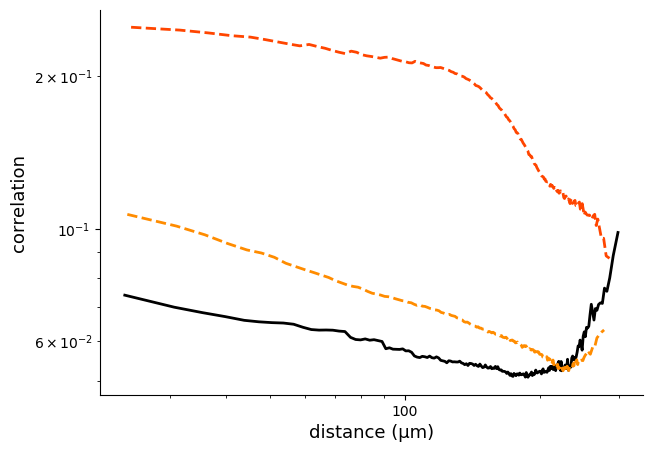

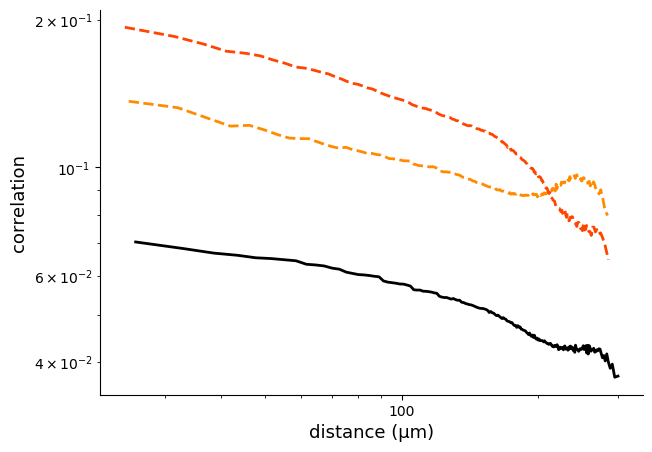

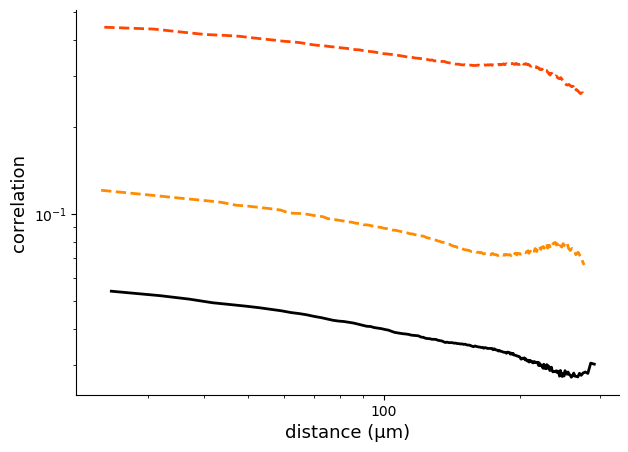

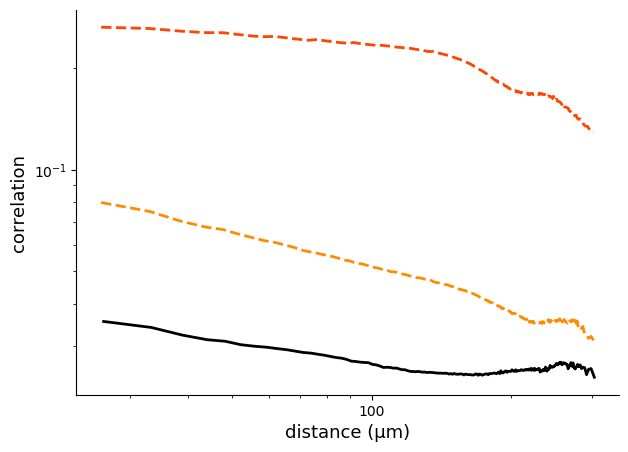

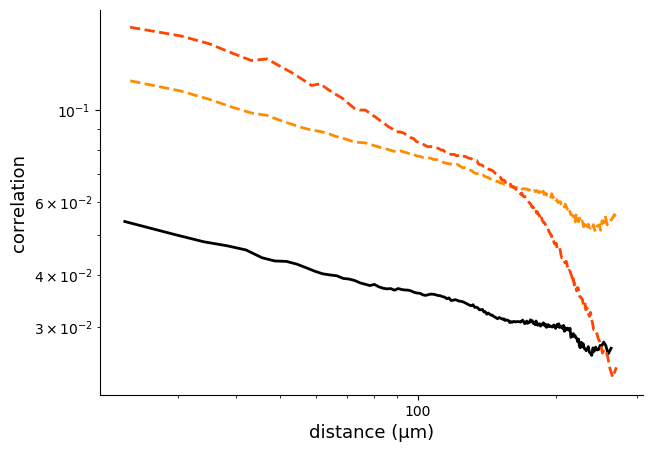

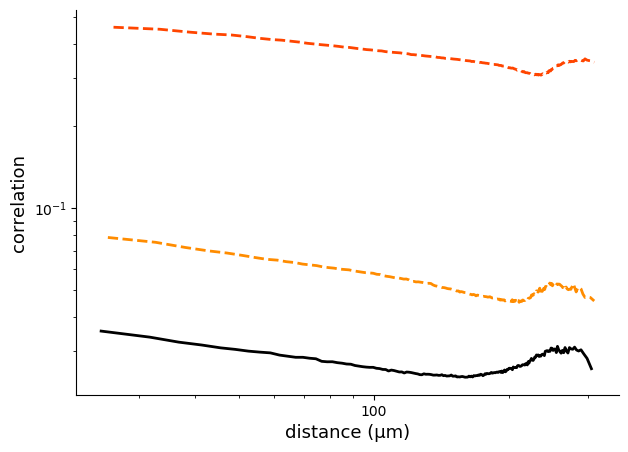

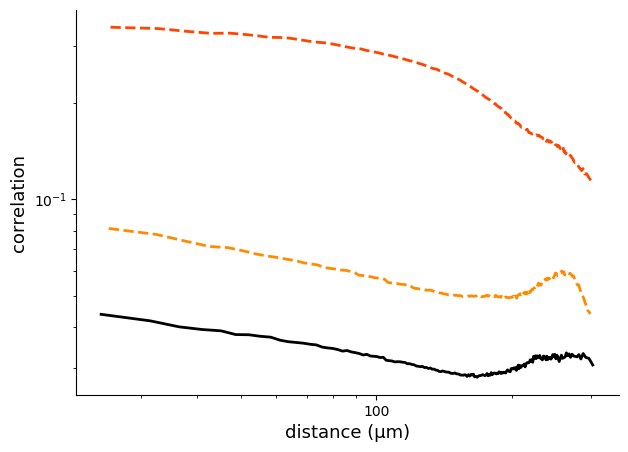

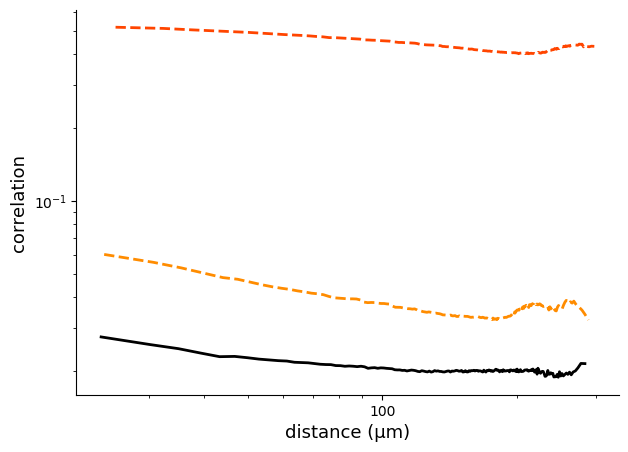

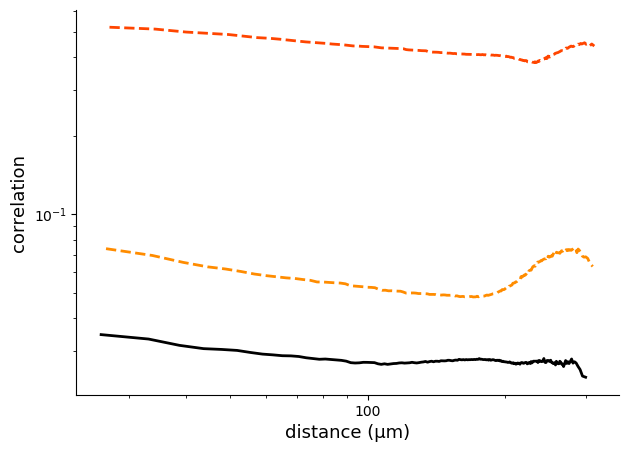

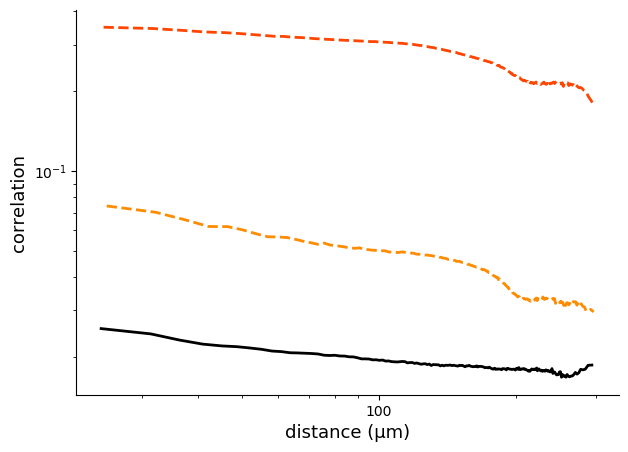

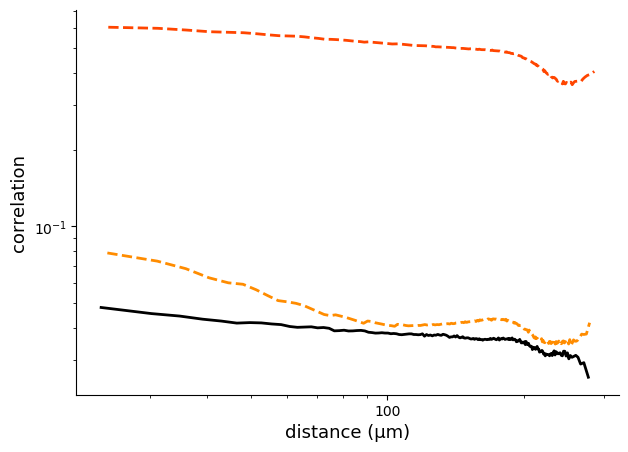

In [43]:
import matplotlib
import powerlaw
sns.reset_orig()
num1 = adfn.name_zero('front',2,12,1)

blnslope, p5slope, p20slope = list(range(11)), list(range(11)), list(range(11))
colors = ['black', 'darkorange','orangered']
lines = ['-', '--', '--']
count=0
for i in num1:
    os.chdir(Fdrop + 'Project/' + experiment)
    blnlist = sorted(glob.glob('*E-' + i + '*BLN*corrdist_bins*'))
    p5list = sorted(glob.glob('*E-' + i + '*PTZ05*corrdist_bins*'))
    p20list = sorted(glob.glob('*E-' + i + '*PTZ20*corrdist_bins*'))
    plotlist = [blnlist,p5list,p20list]
    slopelist = [blnslope,p5slope,p20slope]
    fig, axarr = plt.subplots(figsize = (7,5))
    for e in range(len(plotlist)):
        data = np.load(plotlist[e][0])
        xaxis = data[0]
        yaxis = data[1]
        axarr.plot(xaxis[1:len(xaxis)-1], yaxis[1:len(xaxis)-1], '-', linewidth = 2, markersize = 1, alpha = 1, color = colors[e], linestyle = lines[e])
        slopelist[e][count] = -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][1:150]),np.log10(yaxis[:len(xaxis)-1][1:150]))[0]
    count+=1
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.set_xlabel('distance (μm)', size = '13')
    axarr.set_xticklabels(['100', '100', '100', '100'])
    axarr.set_ylabel('correlation', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()

In [44]:
#EXPONENT
exp = np.zeros((33))
fli = list(range(11))
flist=[]
for i in range(11):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)

exdf = pd.DataFrame({"Exponent":np.append(slopelist[0],np.append(slopelist[1], slopelist[2])) , "Labels":  np.append(adfn.repeat_list('Baseline',11),np.append(adfn.repeat_list('PTZ 5mM',11),adfn.repeat_list('PTZ 20mM',11))), "Fish":flist})

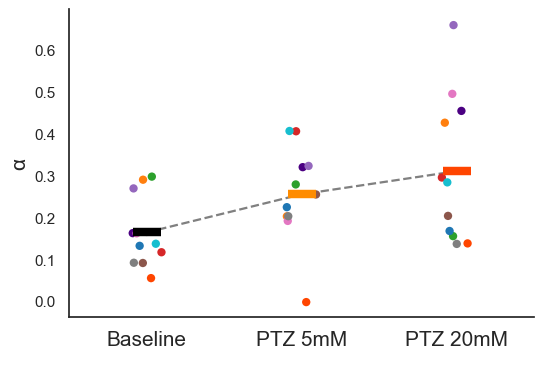

In [45]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['black','darkorange','orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="Exponent", data = exdf, hue = 'Labels', palette = colors2, join=True, ci=0, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.pointplot(x="Labels", y="Exponent", data = exdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="Exponent", data = exdf, hue = 'Fish', palette = colors1, size = 6, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('α', size = '15')
ax.set_xticklabels(['Baseline', 'PTZ 5mM', 'PTZ 20mM'], size = 15)
ax.legend_.remove()
#plt.hlines(1, -0.05 ,2, linestyle = '--', color = 'grey')
#plt.ylim(0.5,1.3)
plt.show()

In [46]:
adfn.ttest(exdf, 'Labels', 'Exponent', ['Baseline', 'PTZ 5mM', 'PTZ 20mM'], mode='multiple')[0]

[[nan, nan, 0.016666666666666666, 'Not significant', 'Baseline - Baseline'],
 [-2.4516709784986195,
  0.03415996090541669,
  0.016666666666666666,
  'Not significant',
  'Baseline - PTZ 5mM'],
 [-3.2178666862720333,
  0.00920838890991934,
  0.016666666666666666,
  'Significant',
  'Baseline - PTZ 20mM']]

### Eigenspectrum
* change in slope in seizure vs baseline
* behaviour dimensionality collapse

In [47]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnraw = sorted(glob.glob('*BLN*_cutrealtrace.npy'))
p5raw = sorted(glob.glob('*PTZ05*_cutrealtrace.npy'))
p20raw = sorted(glob.glob('*PTZ20*_cutrealtrace.npy'))
blnpcv = sorted(glob.glob('*BLN*pcavar.npy'))
p5pcv = sorted(glob.glob('*PTZ05*pcavar.npy'))
p20pcv = sorted(glob.glob('*PTZ20*pcavar.npy'))

In [48]:
#Calculate entire trace PC-variance
""""from sklearn import decomposition
p5pcv = list(range(len(p5raw)))
for e in range(len(p5raw)):
    p_data = np.load(p5raw[e])
    n_components = p_data.shape[1]
    p_pca = decomposition.PCA(n_components) 
    p_fit = p_pca.fit(p_data) 
    p5pcv[e] = p_fit.explained_variance_ratio_
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.save_name(e, p5raw) + '_' + 'pcavar.npy', p5pcv[e])
    print('Saved fish #' + str(e))

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-48-e113d185390f>, line 11)

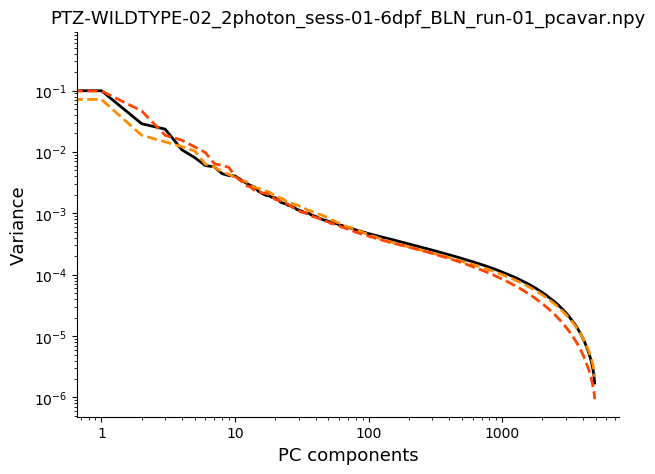

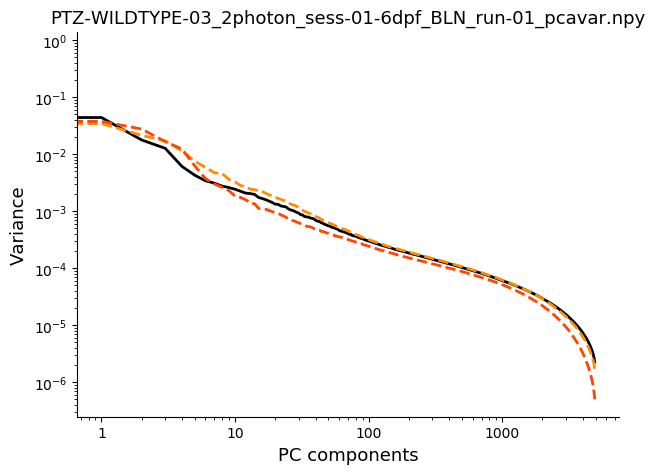

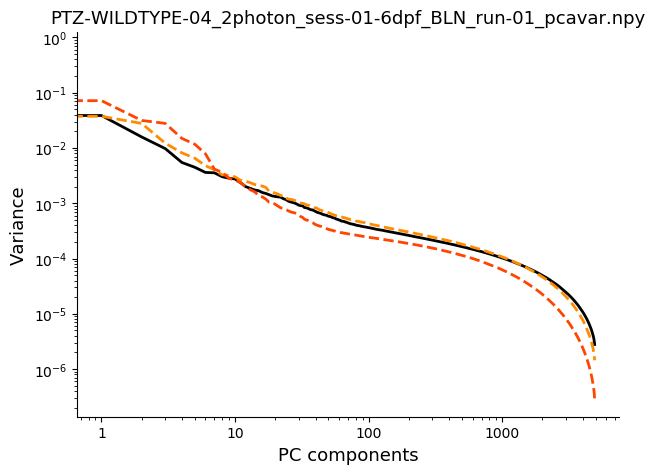

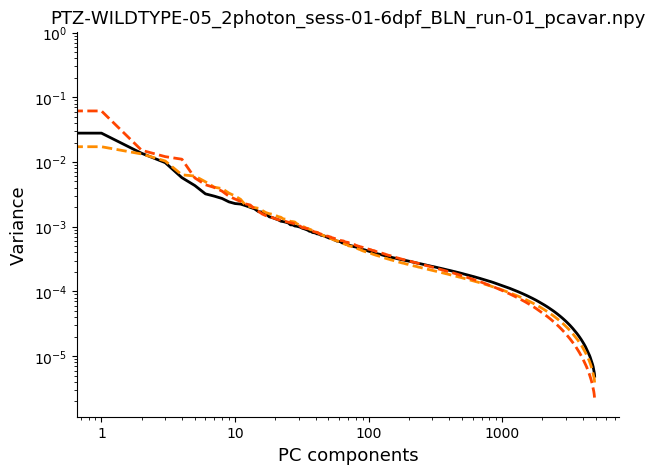

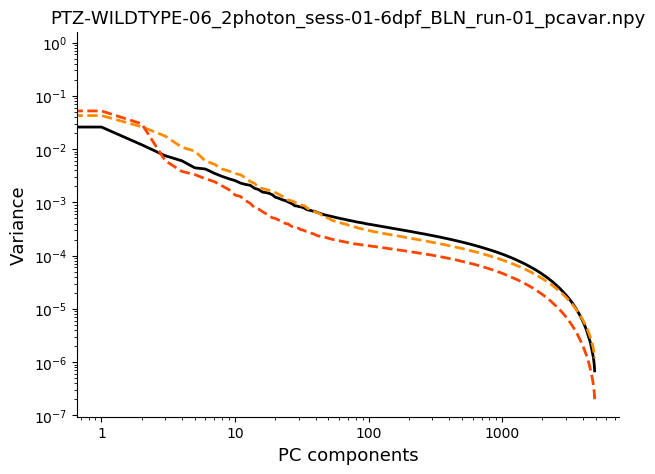

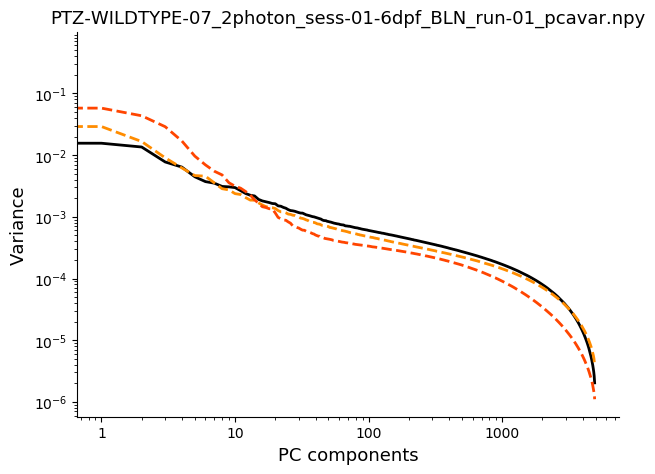

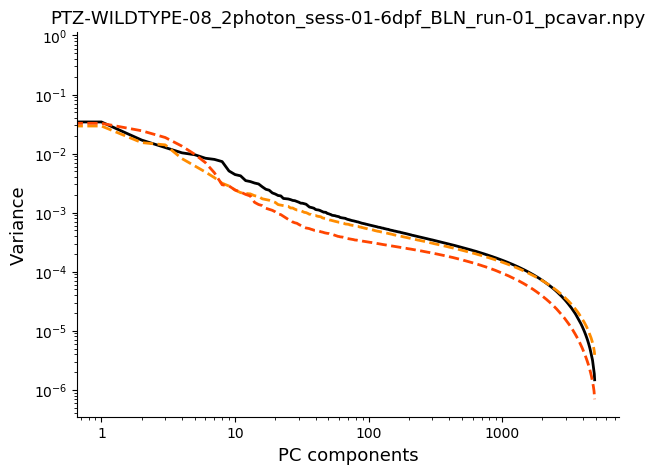

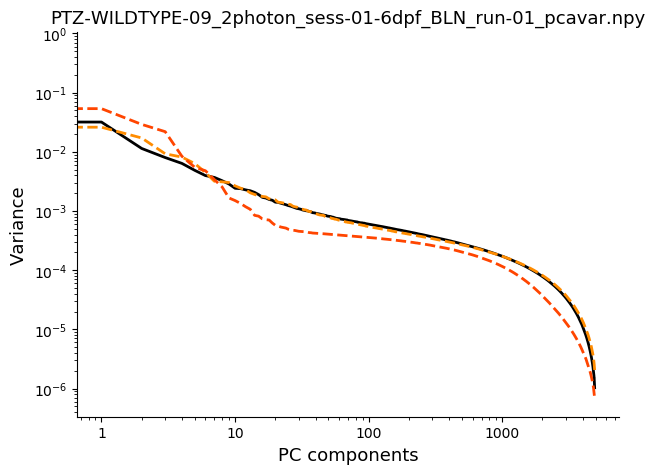

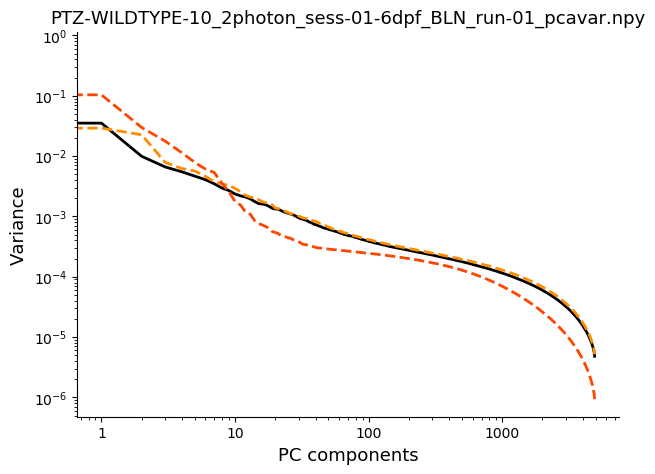

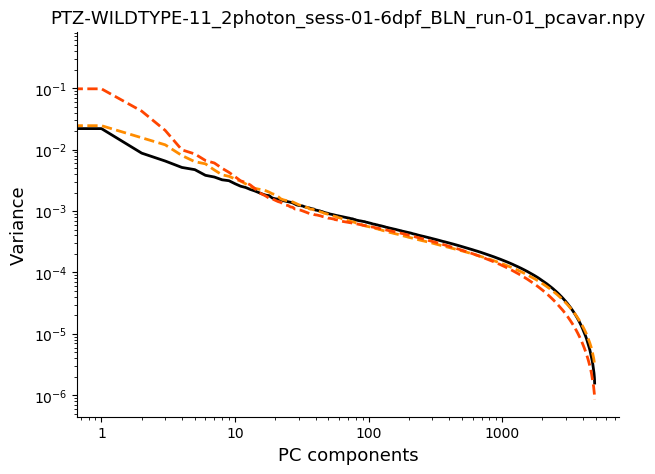

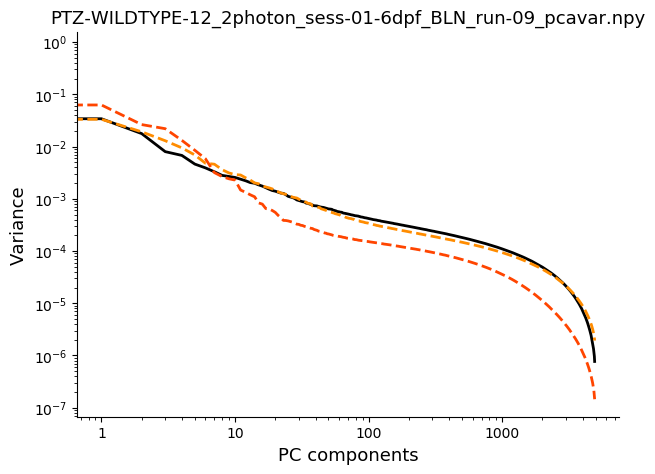

In [49]:
import matplotlib
import powerlaw
sns.reset_orig()
num1 = adfn.name_zero('front',2,12,1)

blnslope, p5slope, p20slope = list(range(11)), list(range(11)), list(range(11))
colors = ['black', 'darkorange','orangered']
lines = ['-', '--', '--']
count=0
for i in num1:
    os.chdir(Fdrop + 'Project/' + experiment)
    blnlist = sorted(glob.glob('*E-' + i + '*BLN*_pcavar.npy*'))
    p5list = sorted(glob.glob('*E-' + i + '*PTZ05*_pcavar.npy*'))
    p20list = sorted(glob.glob('*E-' + i + '*PTZ20*_pcavar.npy*'))
    plotlist = [blnlist,p5list,p20list]
    slopelist = [blnslope,p5slope,p20slope]
    fig, axarr = plt.subplots(figsize = (7,5))
    for e in range(len(plotlist)):
        data = np.load(plotlist[e][0])
        xaxis = np.linspace(0,np.shape(data)[0], num = np.shape(data)[0]+1)
        yaxis = data
        axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 2, markersize = 1, alpha = 1, color = colors[e], linestyle = lines[e])
        slopelist[e][count] = -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][1:]),np.log10(yaxis[:len(xaxis)-1][1:]))[0]
    count+=1
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axarr.set_title(str(blnlist[0]), size = '13')
    axarr.set_ylabel('Variance', size = '13')
    axarr.set_xlabel('PC components', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()

In [50]:
#EXPONENT
exp = np.zeros((33))
fli = list(range(11))
flist=[]
for i in range(11):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)

exdf = pd.DataFrame({"Exponent":np.append(slopelist[0],np.append(slopelist[1], slopelist[2])) , "Labels":  np.append(adfn.repeat_list('Baseline',11),np.append(adfn.repeat_list('PTZ 5mM',11),adfn.repeat_list('PTZ 20mM',11))), "Fish":flist})

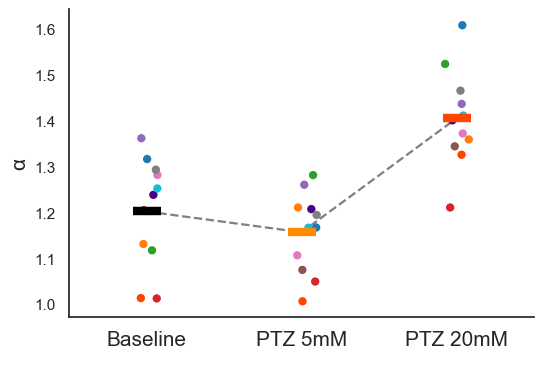

In [51]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['black','darkorange','orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="Exponent", data = exdf, hue = 'Labels', palette = colors2, join=True, ci=0, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.pointplot(x="Labels", y="Exponent", data = exdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="Exponent", data = exdf, hue = 'Fish', palette = colors1, size = 6, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('α', size = '15')
ax.set_xticklabels(['Baseline', 'PTZ 5mM', 'PTZ 20mM'], size = 15)
ax.legend_.remove()
#plt.hlines(1, -0.05 ,2, linestyle = '--', color = 'grey')
#plt.ylim(0.5,1.3)
plt.show()

In [52]:
adfn.ttest(exdf, 'Labels', 'Exponent', ['Baseline', 'PTZ 5mM', 'PTZ 20mM'], mode='single')

[[1.4295761508594784,
  0.18332736555444026,
  0.025,
  'Not significant',
  'Baseline - PTZ 5mM'],
 [-6.751579701032814,
  5.032342292450448e-05,
  0.025,
  'Significant',
  'Baseline - PTZ 20mM']]

# Null models
* Null 1 - shuffle all - does a completely stochastic system generate avalanches?
* Null 2 - neighbour swap - is the spatial structure of cells important for generating critical avalanche dynamics?
* Null 3 - temporal shuffle - is the temporal structure important/signal memory? 

In [4]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_av.npy*'))
space_list = sorted(glob.glob('*BLN*_swapredo*av*'))
time_list = sorted(glob.glob('*BLN*_autoredo*av*'))
slide_list = sorted(glob.glob('*BLN*_slideredo*av*'))

In [109]:
string_labels = []
y = 5
for i in range(0,5,10):
    string_labels.append(r"$10^{%02d}$" % (i/10.0))

In [110]:
string_labels

['$10^{00}$']

In [117]:
labels = ['10$^1$','10$^1$','10$^1$','10$^1$']

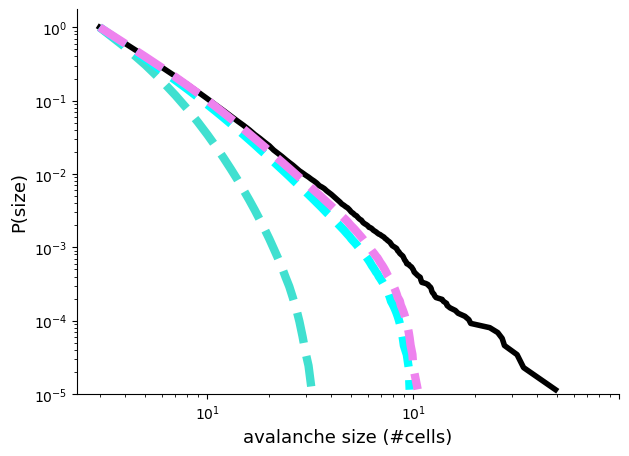

In [118]:
fig, axarr = plt.subplots(figsize = (7,5))
avdistcut = np.load(blnlist[0])[choose]
powerlaw.plot_ccdf(avdistcut,  linewidth = 4, markersize = 1, alpha = 1, c = colors[0])

nulist = [space_list, time_list, slide_list]

for e in range(len(nulist)):
    inp = getsize(nulist[e], choose)
    mean_null = adfn.mean_distribution(inp)
    powerlaw.plot_ccdf(mean_null,  linewidth = 6, markersize = 1, alpha = 1, c = colors[e+1], linestyle = '--')

axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.ylim(bottom = 0.00001)  
plt.xlim(right = 1000)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
axarr.set_xticklabels(labels)
#plt.savefig(Ffig + 'avsize_null_dist' + str(count) + '.svg', transparent = True)
count+=1
plt.show()

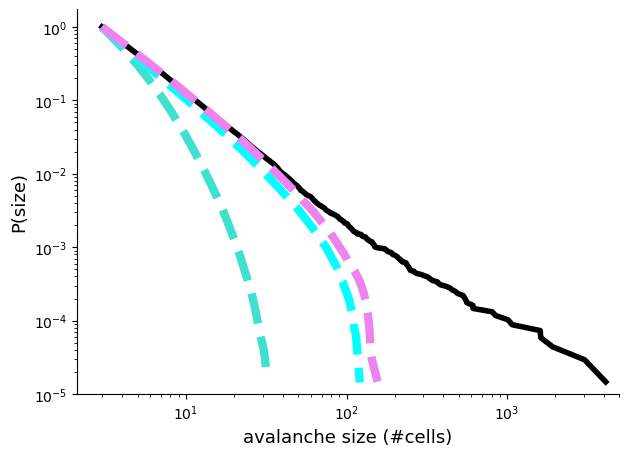

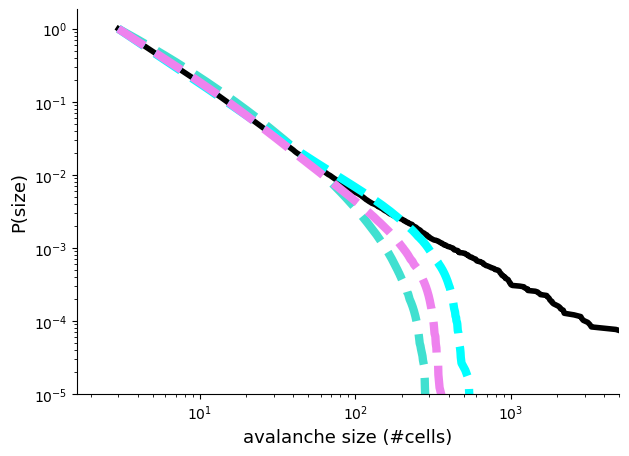

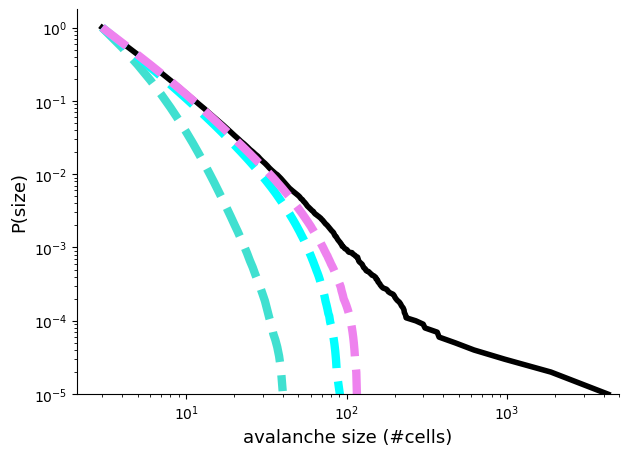

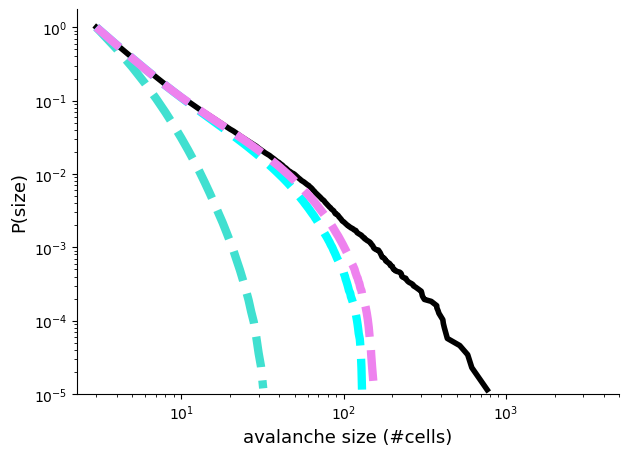

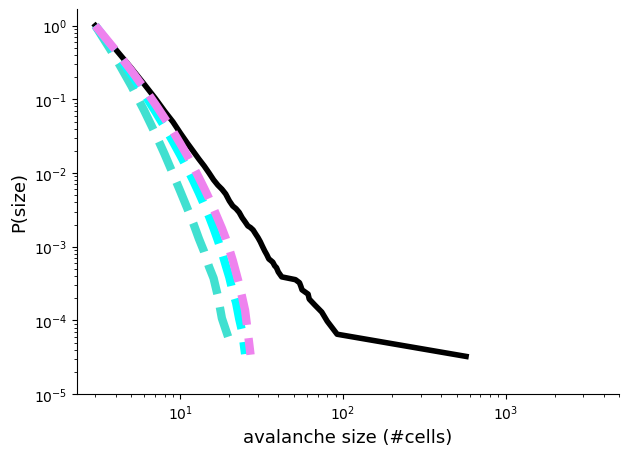

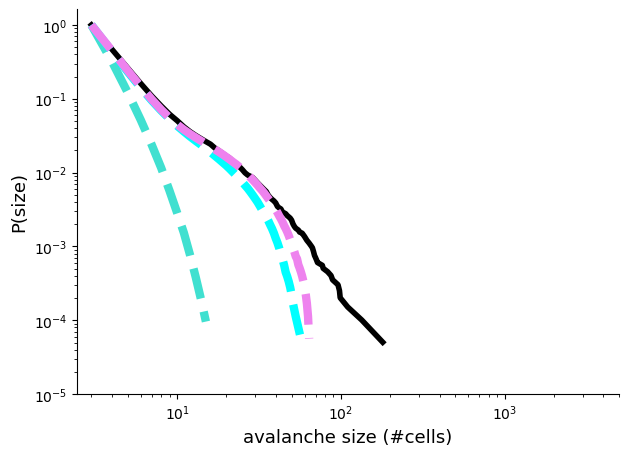

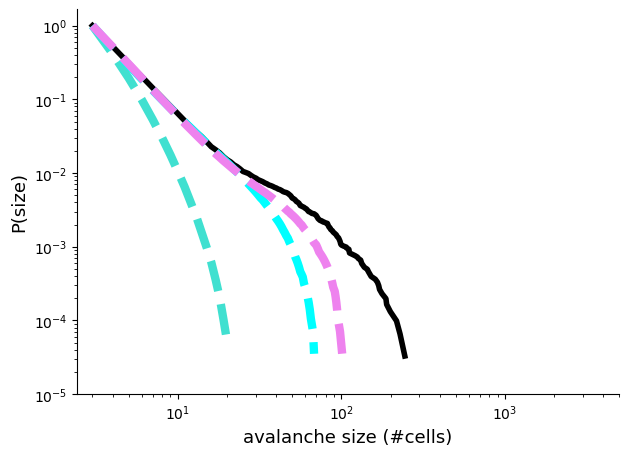

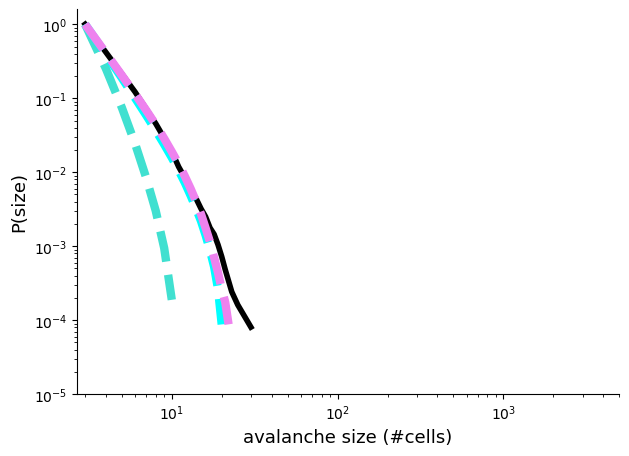

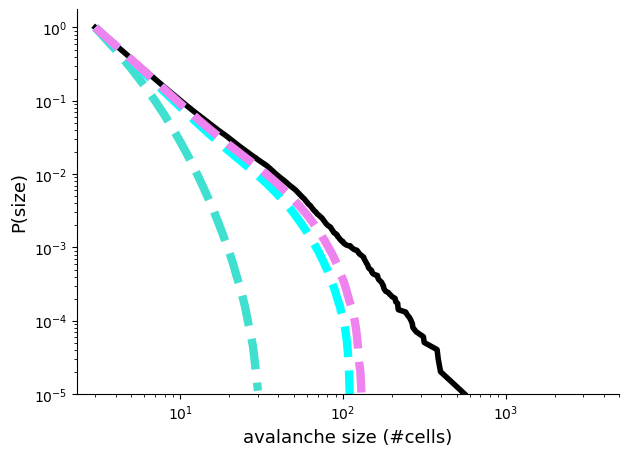

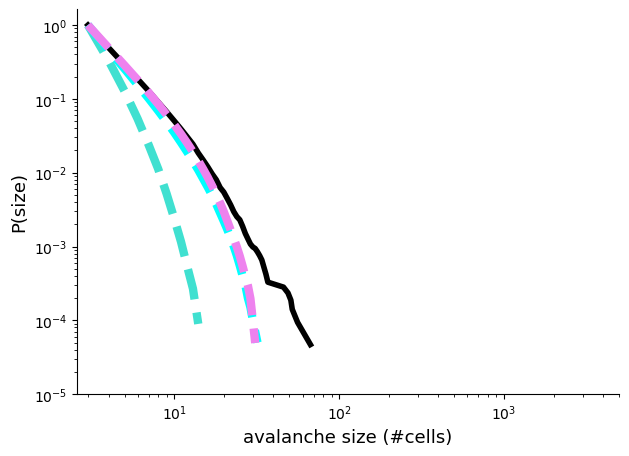

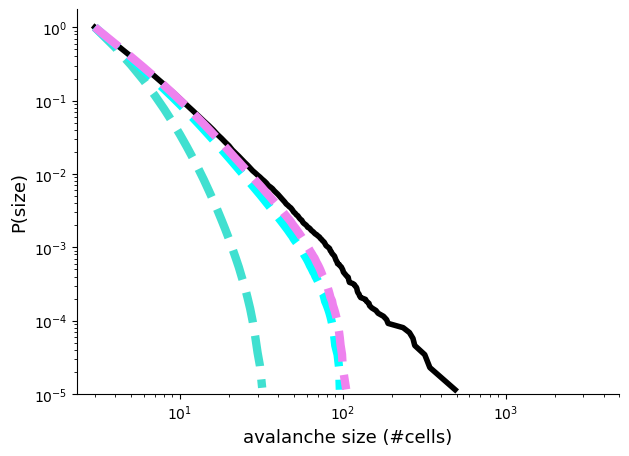

In [121]:
labels = ['10$^1$','10$^1$','10$^1$','10$^2$','10$^3$']

def getsize(distlist, choose):
    output_list = list(range(len(distlist)))
    for i in range(len(distlist)):
        output_list[i] = np.load(distlist[i])[choose]
    return(output_list)

sns.reset_orig()
import matplotlib
import powerlaw
colors = ['black', 'turquoise','cyan', 'violet']

num1 = adfn.name_zero('front',2,12,1)

choose=0
count = 0
for i in num1:
    os.chdir(Fdrop + 'Project/' + experiment)
    blnlist = sorted(glob.glob('*E-' + i + '*BLN*_av.npy*'))
    space_list = sorted(glob.glob('*E-' + i + '*BLN*swapredo*av*'))
    time_list = sorted(glob.glob('*E-' + i + '*BLN*autoredo*av*'))
    slide_list = sorted(glob.glob('*E-' + i + '*BLN*slideredo*av*'))
    
    fig, axarr = plt.subplots(figsize = (7,5))
    avdistcut = np.load(blnlist[0])[choose]
    powerlaw.plot_ccdf(avdistcut,  linewidth = 4, markersize = 1, alpha = 1, c = colors[0])

    nulist = [space_list, time_list, slide_list]

    for e in range(len(nulist)):
        inp = getsize(nulist[e], choose)
        mean_null = adfn.mean_distribution(inp)
        powerlaw.plot_ccdf(mean_null,  linewidth = 6, markersize = 1, alpha = 1, c = colors[e+1], linestyle = '--')
            
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    plt.ylim(bottom = 0.00001)  
    plt.xlim(right = 5000)  
    #axarr.set_title(str(blnlist[0]), size = '13')
    axarr.set_ylabel('P(size)', size = '13')
    axarr.set_xlabel('avalanche size (#cells)', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    axarr.set_xticklabels(labels)
    plt.savefig(Ffig + 'avsize_null_dist' + str(count) + '.svg', transparent = True)
    count+=1
    plt.show()

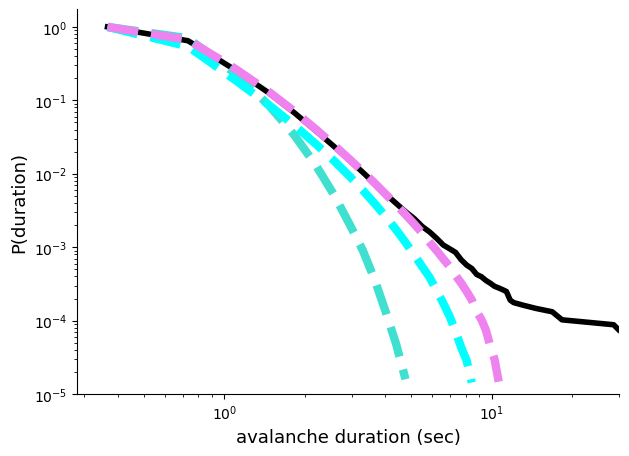

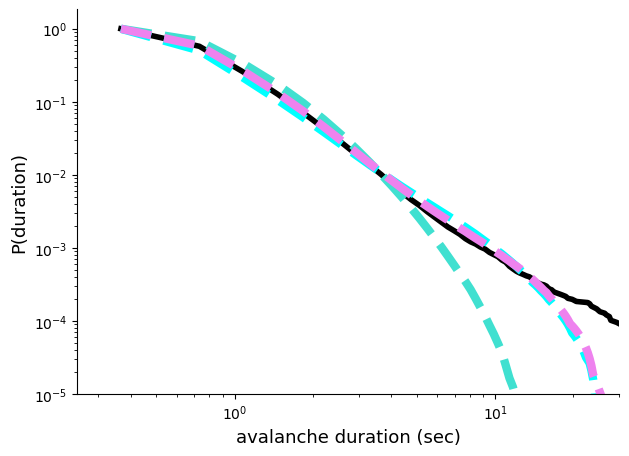

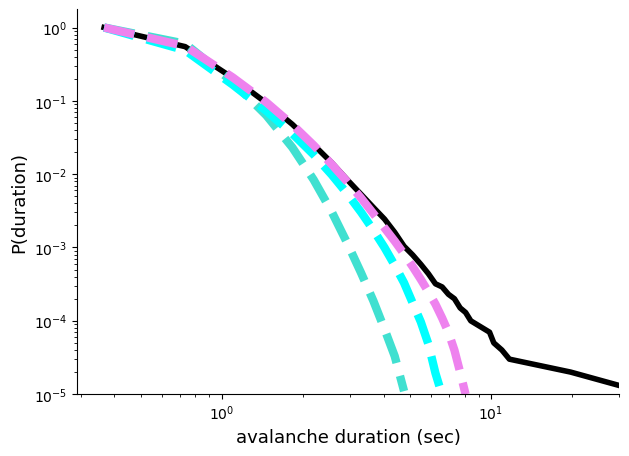

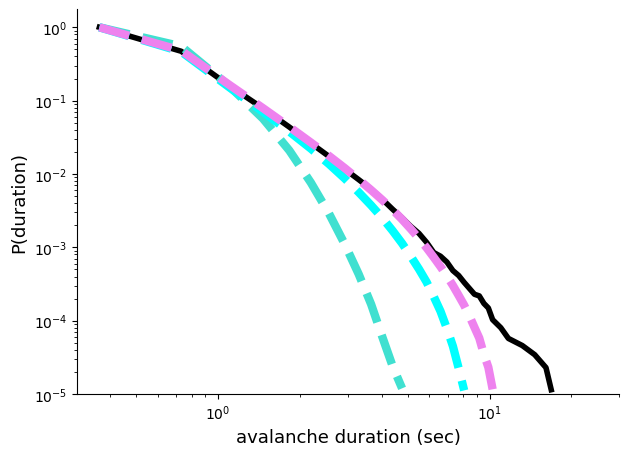

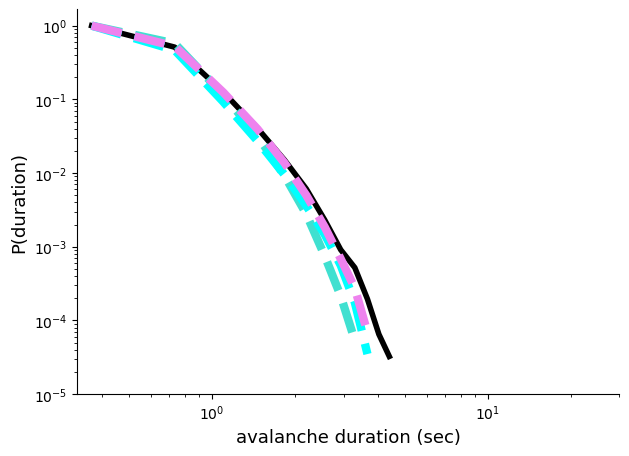

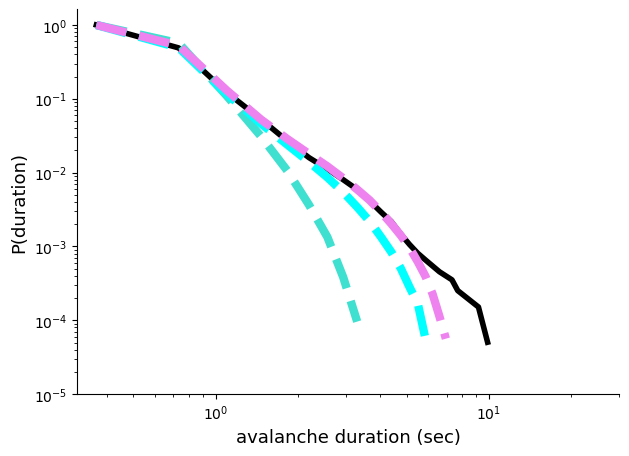

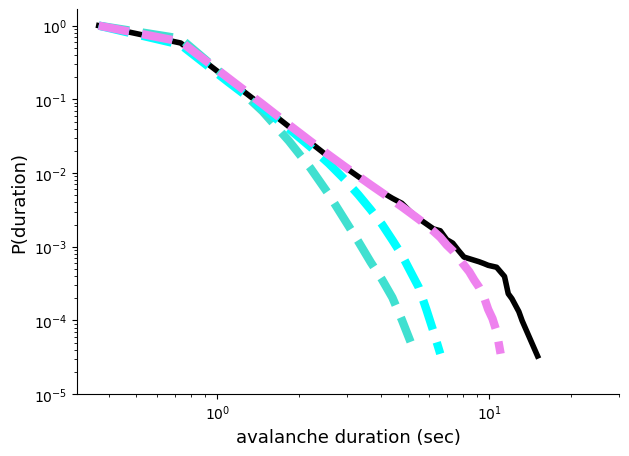

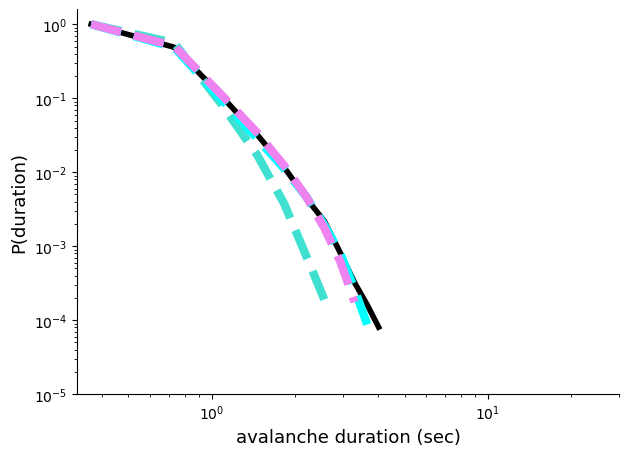

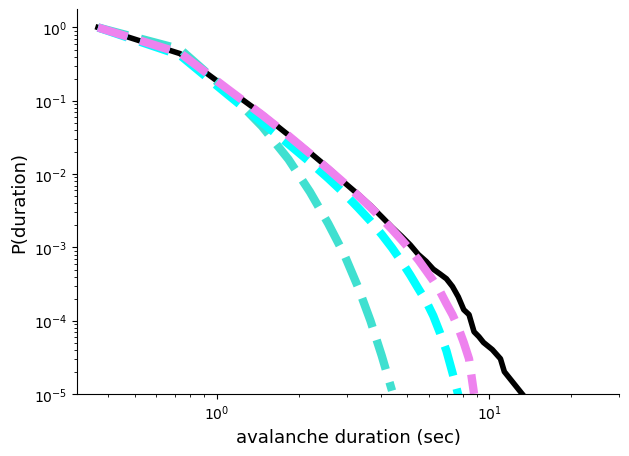

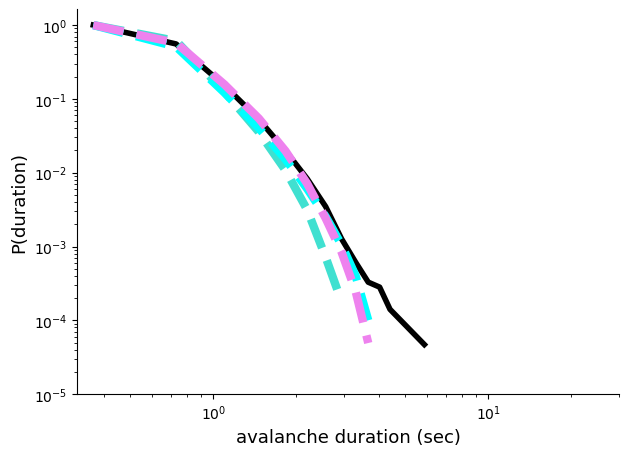

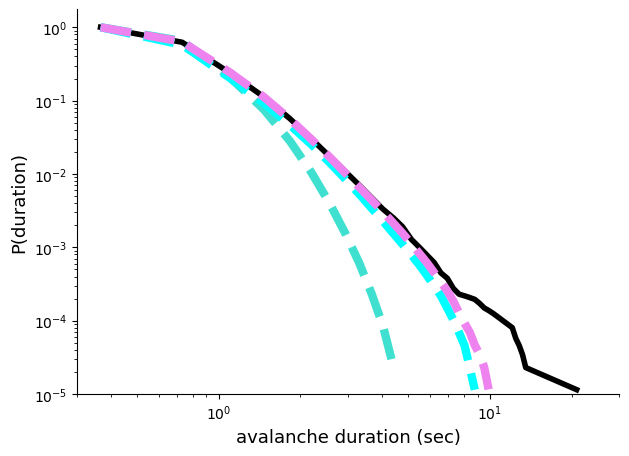

In [126]:
labels = ['10$^1$','10$^1$','10$^0$','10$^1$']

def getsize(distlist, choose):
    output_list = list(range(len(distlist)))
    for i in range(len(distlist)):
        output_list[i] = (1/2.73)*np.load(distlist[i])[choose]
    return(output_list)

sns.reset_orig()
import matplotlib
import powerlaw
colors = ['black', 'turquoise','cyan', 'violet']

num1 = adfn.name_zero('front',2,12,1)

choose=1
count = 0
for i in num1:
    os.chdir(Fdrop + 'Project/' + experiment)
    blnlist = sorted(glob.glob('*E-' + i + '*BLN*_av.npy*'))
    space_list = sorted(glob.glob('*E-' + i + '*BLN*swapredo*av*'))
    time_list = sorted(glob.glob('*E-' + i + '*BLN*autoredo*av*'))
    slide_list = sorted(glob.glob('*E-' + i + '*BLN*slideredo*av*'))
    
    fig, axarr = plt.subplots(figsize = (7,5))
    avdistcut = (1/2.73)*np.load(blnlist[0])[choose]
    powerlaw.plot_ccdf(avdistcut,  linewidth = 4, markersize = 1, alpha = 1, c = colors[0])

    nulist = [space_list, time_list, slide_list]

    for e in range(len(nulist)):
        inp = getsize(nulist[e], choose)
        mean_null = adfn.mean_distribution(inp)
        powerlaw.plot_ccdf(mean_null,  linewidth = 6, markersize = 1, alpha = 1, c = colors[e+1], linestyle = '--')
            
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    plt.ylim(bottom = 0.00001)  
    plt.xlim(right = 30)  
    #axarr.set_title(str(blnlist[0]), size = '13')
    axarr.set_ylabel('P(duration)', size = '13')
    axarr.set_xlabel('avalanche duration (sec)', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    axarr.set_xticklabels(labels)

    plt.savefig(Ffig + 'avdur_null_dist' + str(count) + '.svg', transparent = True)
    count+=1
    plt.show()

In [142]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 
os.chdir(Fdrop + 'Project/' + experiment)
size= sorted(glob.glob('*null*size*.npy'))
dur= sorted(glob.glob('*null*dur*.npy'))
size = size[1], size[0], size[2]
dur = dur[1], dur[0], dur[2]
size, dur

(('null_ks-space-size.npy', 'null_ks-phase-size.npy', 'null_ks-time-size.npy'),
 ('null_ks-space-dur.npy', 'null_ks-phase-dur.npy', 'null_ks-time-dur.npy'))

In [157]:
#SIZE - KS
listlist = size
ks_comb, cols_comb, lab_comb = [],[], []
name_list = 'spatial', 'correlation', 'autocorrelation'

for i in range(len(listlist)):
    curr_list = np.load(listlist[i], allow_pickle=True)
    cols_comb = np.append(cols_comb, np.hstack((adfn.repeat_list('emp', len(curr_list[0])), adfn.repeat_list(name_list[i], len(curr_list[1]) ))))
    ks_comb = np.append(ks_comb, np.hstack((curr_list[0], curr_list[1])))
    lab_comb = np.append(lab_comb, adfn.repeat_list(name_list[i], (11*2)))

size_df = pd.DataFrame({"ks":ks_comb , "Labels": lab_comb  , "colour":cols_comb})

In [158]:
size_df

,ks,Labels,colour
0,0.131360,spatial,emp
1,0.051566,spatial,emp
2,0.125100,spatial,emp
3,0.105604,spatial,emp
4,0.112649,spatial,emp
...,...,...,...
61,0.003255,autocorrelation,autocorrelation
62,0.004970,autocorrelation,autocorrelation
63,0.001942,autocorrelation,autocorrelation
64,0.004240,autocorrelation,autocorrelation


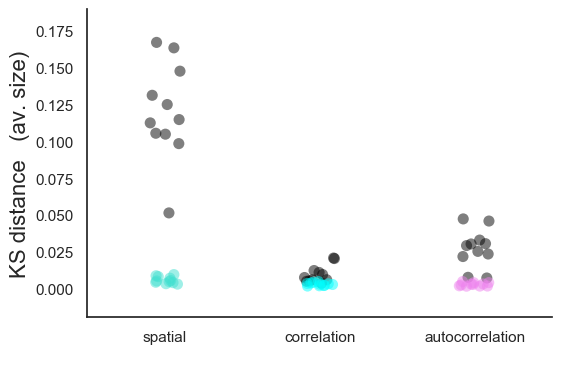

In [163]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors = ['black', 'turquoise','cyan', 'violet']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.stripplot(x="Labels", y="ks", data=size_df, hue = 'colour', palette = colors, size = 8, jitter = True ,alpha = 0.5)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('KS distance   (av. size)', size = '16')
#ax.set_xticklabels(['Baseline', 'inter-ictal', 'ictal'], size = 15)
ax.legend_.remove()
plt.savefig(Ffig + 'null_ks_size.svg', transparent = True)
plt.show()

In [62]:
space = size_df[size_df['Labels'] == 'space']
time = size_df[size_df['Labels'] == 'time']
phase = size_df[size_df['Labels'] == 'phase']

emp_space = space[space['colour'] == 'emp']
null_space = space[space['colour'] == 'null']
emp_time = time[time['colour'] == 'emp']
null_time = time[time['colour'] == 'null']
emp_phase = phase[phase['colour'] == 'emp']
null_phase = phase[phase['colour'] == 'null']

In [63]:
for i in range(len(null_list)):
    p = stats.normaltest(null_list[i]['ks'])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)


In [64]:
#Space
alpha = 0.05/3

t, p = stats.ttest_rel(emp_space['ks'], null_space['ks'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 12.247097501749328   p = 2.4112759489242163e-07
Samples are significantly different


In [65]:
#Time
alpha = 0.05/3

t, p = stats.ttest_rel(emp_time['ks'], null_time['ks'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 6.37651729543231   p = 8.071911360260258e-05
Samples are significantly different


In [66]:
#Phase
alpha = 0.05/3

t, p = stats.ttest_rel(emp_phase['ks'], null_phase['ks'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 3.837480094379891   p = 0.003278550307618146
Samples are significantly different


In [166]:
#SIZE - KS
listlist = dur
ks_comb, cols_comb, lab_comb = [],[], []
name_list = 'spatial', 'correlation', 'autocorrelation'

for i in range(len(listlist)):
    curr_list = np.load(listlist[i], allow_pickle=True)
    cols_comb = np.append(cols_comb, np.hstack((adfn.repeat_list('emp', len(curr_list[0])), adfn.repeat_list(name_list[i], len(curr_list[1]) ))))
    ks_comb = np.append(ks_comb, np.hstack((curr_list[0], curr_list[1])))
    lab_comb = np.append(lab_comb, adfn.repeat_list(name_list[i], (11*2)))

dur_df = pd.DataFrame({"ks":ks_comb , "Labels": lab_comb  , "colour":cols_comb})

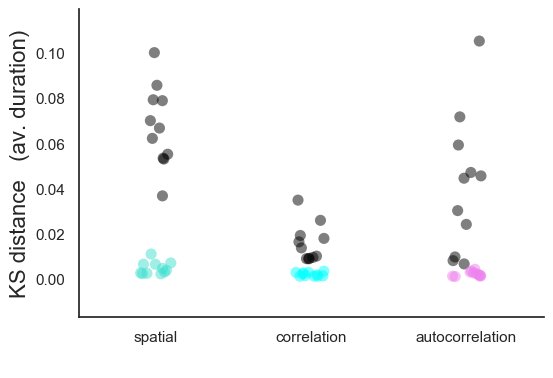

In [167]:

from matplotlib.collections import PathCollection
sns.set(style="white")
colors = ['black', 'turquoise','cyan', 'violet']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.stripplot(x="Labels", y="ks", data=dur_df, hue = 'colour', palette = colors, size = 8, jitter = True ,alpha = 0.5)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('KS distance   (av. duration)', size = '16')
#ax.set_xticklabels(['Baseline', 'inter-ictal', 'ictal'], size = 15)
ax.legend_.remove()
plt.savefig(Ffig + 'null_ks_dur.svg', transparent = True)
plt.show()


In [67]:
space = dur_df[dur_df['Labels'] == 'space']
time = dur_df[dur_df['Labels'] == 'time']
phase = dur_df[dur_df['Labels'] == 'phase']

emp_space = space[space['colour'] == 'emp']
null_space = space[space['colour'] == 'null']
emp_time = time[time['colour'] == 'emp']
null_time = time[time['colour'] == 'null']
emp_phase = phase[phase['colour'] == 'emp']
null_phase = phase[phase['colour'] == 'null']

In [68]:
null_list = [emp_space, null_space,emp_time, null_time,emp_phase, null_phase]

In [69]:
for i in range(len(null_list)):
    p = stats.normaltest(null_list[i]['ks'])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)


In [70]:
#Space
alpha = 0.05/3

t, p = stats.ttest_rel(emp_space['ks'], null_space['ks'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 11.585841288311132   p = 4.0619751287310367e-07
Samples are significantly different


In [71]:
#Time
alpha = 0.05/3

t, p = stats.ttest_rel(emp_time['ks'], null_time['ks'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 4.215801864040486   p = 0.0017834454098288298
Samples are significantly different


In [72]:
#Phase
alpha = 0.05/3

t, p = stats.ttest_rel(emp_phase['ks'], null_phase['ks'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 5.9334139448645455   p = 0.00014441922443055933
Samples are significantly different


In [47]:
num1 = adfn.name_zero('front',2,12,1)
for choose in range(2):
    av_name = 'size', 'dur'
    for null_choose in range(3):
        null_name = ['space', 'time', 'phase']
        space_list, time_list, slide_list = [],[],[]


        null_ks = np.zeros(len(num1))
        bln_ks = np.zeros(len(num1))
        count = 0

        ks_out = list(range(2))

        def getav(distlist, choose):
            output_list = list(range(len(distlist)))
            for i in range(len(distlist)):
                output_list[i] = np.load(distlist[i])[choose]
            return(output_list)

        for x,i in enumerate(num1):
            os.chdir(Fdrop + 'Project/' + experiment)
            blnlist = sorted(glob.glob('*E-' + i + '*BLN*_av.npy*'))
            if null_name[null_choose] == 'space':
                space_list = sorted(glob.glob('*E-' + i + '*BLN*swapredo*av*'))
            if null_name[null_choose] == 'time':
                time_list = sorted(glob.glob('*E-' + i + '*BLN*autoredo*av*'))
            if null_name[null_choose] == 'phase':
                slide_list = sorted(glob.glob('*E-' + i + '*BLN*slideredo*av*'))

            null_list = space_list, time_list, slide_list 
            curr_bln = np.load(blnlist[0])[choose]
            av_list = getav(null_list[null_choose], choose)
            curr_mean = adfn.mean_distribution(av_list)
            bln_ks[x] = stats.ks_2samp(curr_mean, curr_bln)[0]
            fill = []
            for e in range(len(av_list)):
                fill = np.append(fill,  stats.ks_2samp(curr_mean, av_list[e])[0])
            null_ks[x] = np.mean(fill)
            
        ks_out = [bln_ks, null_ks]
        np.save(savepath + 'null_ks-' + null_name[null_choose] + '-' + av_name[choose] + '.npy', ks_out)
        print('Done ' + null_name[null_choose] + av_name[choose])

Done spacesize
Done timesize
Done phasesize
Done spacedur
Done timedur
Done phasedur


In [205]:
num1 = adfn.name_zero('front',2,12,1)
LLR_space = np.zeros((len(num1), 2))
LLR_time = np.zeros((len(num1), 2))
LLR_phase = np.zeros((len(num1), 2))


for choose in range(2):
    av_name = 'size', 'dur'
    for null_choose in range(3):
        null_name = ['space', 'time', 'phase']
        space_list, time_list, slide_list = [],[],[]


        def getav(distlist, choose):
            output_list = list(range(len(distlist)))
            for i in range(len(distlist)):
                output_list[i] = np.load(distlist[i])[choose]
            return(output_list)

        for x,i in enumerate(num1):
            os.chdir(Fdrop + 'Project/' + experiment)
            blnlist = sorted(glob.glob('*E-' + i + '*BLN*_av.npy*'))
            if null_name[null_choose] == 'space':
                space_list = sorted(glob.glob('*E-' + i + '*BLN*swap*'))
            if null_name[null_choose] == 'time':
                time_list = sorted(glob.glob('*E-' + i + '*BLN*auto*'))
            if null_name[null_choose] == 'phase':
                slide_list = sorted(glob.glob('*E-' + i + '*BLN*slide*'))

            null_list = space_list, time_list, slide_list 
            av_list = getav(null_list[null_choose], choose)
            curr_mean = adfn.mean_distribution(av_list)
            

            if choose == 0:  
                data = curr_mean
                npart = 2000
                sizes=data
                M=len(sizes)
                a=min(sizes) #define xmin
                b=max(sizes) #define xmax
                size_ln=isfn.IS_LN(npart, sizes, M, a, b)
                size_po=isfn.IS(npart, sizes, M, a, b)
                llr = size_po[1] - size_ln[2]
                
            elif choose == 1:
                data = curr_mean
                npart = 2000
                sizes=data
                a=2 #define xmin
                b=max(sizes) #define xmax
                M=len(sizes[np.where(sizes>a-1)])
                dur_ln=isfn.IS_LN(npart, sizes, M, a, b)
                dur_po=isfn.IS(npart, sizes, M, a, b)
                llr = dur_po[1] - dur_ln[2]
            
            if null_choose == 0:
                LLR_space[x, choose] = llr
                
            elif null_choose == 1:
                LLR_time[x, choose] = llr

            elif null_choose == 2:
                LLR_phase[x, choose] = llr


                
        #np.save(savepath + 'null_ks-' + null_name[null_choose] + '-' + av_name[choose] + '.npy', ks_out)
        print('Done ' + null_name[null_choose] + av_name[choose])

Done spacesize
Done timesize
Done phasesize
Done spacedur
Done timedur
Done phasedur


In [ ]:
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
savepath = Fdrop + 'Project/' + experiment + os.sep 
av_list = sorted(glob.glob('*redo*av*'))[440:880]
pkg_list = sorted(glob.glob('*redo*pkg*'))[440:880]

In [ ]:
for i in range(len(pkg_list)):
    br = crfn.branch(np.load(pkg_list[i]), np.load(av_list[i]))
    name = pkg_list[i][:pkg_list[i].find('pkg')] 
    np.save(savepath + name + '-branch.npy', br)
    print('Done ' + str(i))

In [ ]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 
os.chdir(Fdrop + 'Project/' + experiment)
bln_blist = sorted(glob.glob('*BLN*_branch*'))
space_blist = sorted(glob.glob('*swap*redo*branch*'))
time_blist = sorted(glob.glob('*auto*redo*branch*'))
phase_blist = sorted(glob.glob('*slide*redo*branch*'))

In [ ]:
num1 = adfn.name_zero('front',2,12,1)
for null_choose in range(3):
    null_name = ['space', 'time', 'phase']
    space_list, time_list, slide_list = [],[],[]

    bln_branch = np.zeros(len(num1))
    null_branch = np.zeros(len(num1))
    count = 0
    br_out = list(range(2))
    for x,i in enumerate(num1):
        os.chdir(Fdrop + 'Project/' + experiment)
        bln_list = sorted(glob.glob('*E-' + i + '*BLN*_branch.npy*'))
        if null_name[null_choose] == 'space':
            space_list = sorted(glob.glob('*E-' + i + '*BLN*swapredo*branch*'))
        if null_name[null_choose] == 'time':
            time_list = sorted(glob.glob('*E-' + i + '*BLN*autoredo*branch*'))
        if null_name[null_choose] == 'phase':
            slide_list = sorted(glob.glob('*E-' + i + '*BLN*slideredo*branch*'))

        null_list = space_list, time_list, slide_list 
        br_list = null_list[null_choose]
        bln_branch[x] = np.load(bln_list[0])

        fill = []
        for e in range(len(br_list)):
            fill = np.append(fill,  np.load(br_list[e]))
        null_branch[x] = np.mean(fill)

    br_out = [bln_branch, null_branch]
    np.save(savepath + 'null_branch-' + null_name[null_choose]  + '.npy', br_out)
    print('Done ' + null_name[null_choose])

In [172]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 
os.chdir(Fdrop + 'Project/' + experiment)
null_blist = sorted(glob.glob('*null*branch*'))
null_blist = null_blist[1], null_blist[0], null_blist[2]
null_blist

('null_branch-space.npy', 'null_branch-phase.npy', 'null_branch-time.npy')

In [173]:
import pandas as pd

listlist = null_blist
br_comb, lab_comb = [],[]

cols_comb = np.append(adfn.repeat_list('empirical', 11), np.append(adfn.repeat_list('spatial', 11), np.append(adfn.repeat_list('corr.', 11), adfn.repeat_list('autocorr.', 11))))
br_comb = np.load(listlist[0])[0]
for i in range(len(listlist)):
    curr_list = np.load(listlist[i])[1]
    for e in range(len(curr_list)):
        br_comb = np.append(br_comb, curr_list[e])

br_df = pd.DataFrame({"BR":br_comb , "Labels": cols_comb})

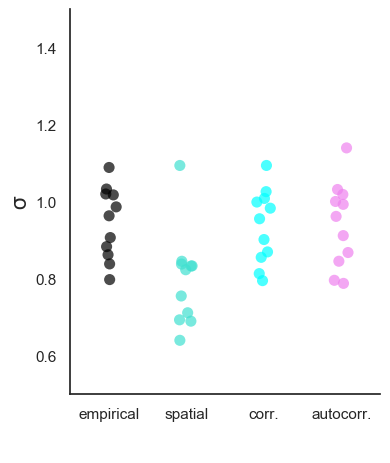

In [174]:
import matplotlib 
import seaborn as sns
colors = ['black', 'turquoise','cyan', 'violet']
sns.set(style="white")
fig, ax = plt.subplots(figsize = (4,5))

ax = sns.stripplot(x="Labels", y="BR", data=br_df, palette = colors, jitter = True, size = 8, alpha = 0.7)
#plt.hlines(np.mean(branchdf['branch ratio']), -0.02 ,0.02, linestyle = '-', color = 'k', lw=4.5)
#plt.hlines(1, -0.15 ,0.15, linestyle = '--', color = 'grey')
ax.set_ylabel('σ', size = '16')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '20')
plt.ylim(0.5,1.5)
plt.savefig(Ffig + 'null_BR.svg', transparent = True)
plt.show()

In [180]:
emp = br_df[br_df['Labels'] == 'empirical']
space = br_df[br_df['Labels'] == 'spatial']
phase = br_df[br_df['Labels'] == 'corr.']
auto = br_df[br_df['Labels'] == 'autocorr.']
null_list = emp['BR'], space['BR'], phase['BR'], auto['BR']


In [182]:
for i in range(len(null_list)):
    p = stats.normaltest(null_list[i])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample does not look Gaussian (reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


In [185]:
from scipy import stats
data = emp['BR']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.9453961035905333 0.028056533616139176


In [186]:
from scipy import stats
data = space['BR']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.7961591633820706 0.03711928078688882


In [187]:
from scipy import stats
data = phase['BR']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.9366547089756608 0.028918684276741657


In [188]:
from scipy import stats
data = auto['BR']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.9414746396308667 0.03307402472381796


In [189]:
#Space
alpha = 0.05/3

t, p = stats.ttest_rel(emp['BR'], space['BR'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 8.840938796943137   p = 4.856234100801096e-06
Samples are significantly different


In [191]:
from scipy.stats import wilcoxon
alpha = 0.05/3

w, p = wilcoxon(emp['BR'], space['BR'], mode='auto')
print('w = ' + str(w) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

w = 1.0   p = 0.001953125
Samples are significantly different


In [192]:
#Time
alpha = 0.05/3

t, p = stats.ttest_rel(emp['BR'], phase['BR'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 3.5118330500210435   p = 0.005614447094012105
Samples are significantly different


In [190]:
#Space
alpha = 0.05/3

t, p = stats.ttest_rel(emp['BR'], auto['BR'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 0.5699710066936227   p = 0.5812755960584322
Samples are the same


In [ ]:
for i in range(len(av_list)):
    curr_av = np.load(av_list)
    dcc = crfn.DCC(curr_av)

In [194]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 
os.chdir(Fdrop + 'Project/' + experiment)
bln_dcc = sorted(glob.glob('*BLN*DCC.npy*')) 
foc_dcc = sorted(glob.glob('*_PTZ05*DCC.npy*')) 
gen_dcc = sorted(glob.glob('*_PTZ20*DCC.npy*')) 
swap_dcc = sorted(glob.glob('*DCC*swap*')) 
time_dcc = sorted(glob.glob('*DCC*auto*')) 
phase_dcc = sorted(glob.glob('*DCC*slide*')) 
swap_dcc, time_dcc, phase_dcc

(['null_DCC-swap.npy'], ['null_DCC-auto.npy'], ['null_DCC-slide.npy'])

In [ ]:
num1 = adfn.name_zero('front', 2, 12, 1)

for null_choose in range(3):
    null_name = ['space', 'time', 'phase']
    save_name = ['swap', 'auto', 'slide']
    space_list, time_list, slide_list = [],[],[]
    dcc_vec = np.zeros(len(num1))


    def getav(distlist):
        output_list = list(range(len(distlist)))
        for i in range(len(distlist)):
            output_list[i] = np.load(distlist[i])
        return(output_list)

    for x,i in enumerate(num1):
        os.chdir(Fdrop + 'Project/' + experiment)
        if null_name[null_choose] == 'space':
            space_list = sorted(glob.glob('*E-' + i + '*BLN*swapredo*av*'))
        if null_name[null_choose] == 'time':
            time_list = sorted(glob.glob('*E-' + i + '*BLN*autoredo*av*'))
        if null_name[null_choose] == 'phase':
            slide_list = sorted(glob.glob('*E-' + i + '*BLN*slideredo*av*'))

        null_list = space_list, time_list, slide_list 
        av_list = getav(null_list[null_choose])
        fill = []
        for r in range(len(av_list)):
            fill = np.append(fill, crfn.DCC(av_list[r]))
        dcc_vec[x] = np.mean(fill)
    name = adfn.name_template([null_list[null_choose][0]], 'short') 
    np.save(savepath + 'null_DCC-' + save_name[null_choose] + '.npy', dcc_vec)
    print('Done ' + str(null_choose))

In [195]:
dcc = np.zeros((11))
lab =list(range(11))

dcc_list = [bln_dcc]
count=0
for i in range(len(dcc_list)):
    for y in range(11):
        dcc[count] = np.load(dcc_list[i][y] ,allow_pickle=True)
        lab[count] = 'empirical'
        count+=1


listlist = swap_dcc, phase_dcc, time_dcc
name_list = 'spatial', 'corr.', 'autocorr.'

dcc_comb = dcc
lab_comb = lab

for i in range(len(listlist)):
    for e in range(len(listlist[i])):
        for x in range(len(np.load(listlist[i][e]))):
            dcc_comb = np.append(dcc_comb, np.load(listlist[i][e])[x])
            lab_comb = np.append(lab_comb,name_list[i])
                              

null_df = pd.DataFrame({"dcc":dcc_comb , "Labels": lab_comb})

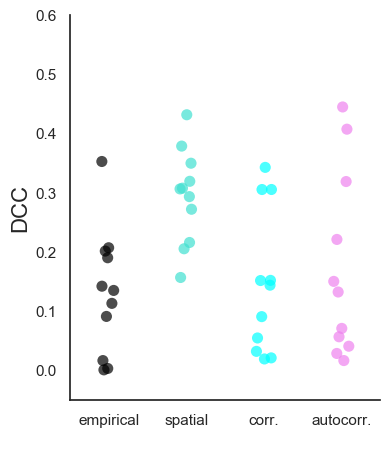

In [196]:
import matplotlib 
import seaborn as sns
colors = ['black', 'turquoise','cyan', 'violet']
sns.set(style="white")
fig, ax = plt.subplots(figsize = (4,5))

ax = sns.stripplot(x="Labels", y="dcc", data=null_df, palette = colors, jitter = True, size = 8, alpha = 0.7)
#plt.hlines(np.mean(branchdf['branch ratio']), -0.02 ,0.02, linestyle = '-', color = 'k', lw=4.5)
#plt.hlines(1, -0.15 ,0.15, linestyle = '--', color = 'grey')
ax.set_ylabel('DCC', size = '16')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '20')
plt.ylim(-0.05,0.6)
plt.savefig(Ffig + 'null_DCC.svg', transparent = True)
plt.show()

In [199]:
emp = null_df[null_df['Labels'] == 'empirical']
space = null_df[null_df['Labels'] == 'spatial']
corr = null_df[null_df['Labels'] == 'corr.']
auto = null_df[null_df['Labels'] == 'autocorr.']
null_list = emp['dcc'], space['dcc'], corr['dcc'], auto['dcc']

In [200]:
for i in range(len(null_list)):
    p = stats.normaltest(null_list[i])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)


In [201]:
from scipy import stats
data = emp['dcc']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.1325462235827563 0.03187587149523042


In [202]:
from scipy import stats
data = space['dcc']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.2946733947557275 0.024013555195686213


In [203]:
from scipy import stats
data = corr['dcc']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.14760498078160736 0.03637851749925274


In [204]:
from scipy import stats
data = auto['dcc']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.17206461195610992 0.046823889040764316


In [205]:
#Space
alpha = 0.05/3

t, p = stats.ttest_rel(emp['dcc'], space['dcc'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -4.4994631154524605   p = 0.0011440539043184768
Samples are significantly different


In [206]:
#Space
alpha = 0.05/3

t, p = stats.ttest_rel(emp['dcc'], corr['dcc'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -0.5413676097799591   p = 0.6001065035488296
Samples are the same


In [207]:
#Space
alpha = 0.05/3

t, p = stats.ttest_rel(emp['dcc'], auto['dcc'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -0.98120643920496   p = 0.3496332277874402
Samples are the same
